In [1]:
import axelrod as axl

from axelrod.random_ import random_choice

C, D = axl.Action.C, axl.Action.D

import time

In [3]:
import pandas as pd

from keras.models import Sequential, load_model

In [4]:
from keras.layers import (
    LSTM,
    Dense,
    Dropout,
    TimeDistributed,
)

In [5]:
import numpy as np
import glob
import matplotlib.pyplot as plt

In [6]:
def read_validation_dataframes(files_location):
    filenames = glob.glob(files_location)
    dfs = []
    for file in filenames:
        df = pd.read_csv(file, index_col=0)
        dfs.append(df)
    df = pd.concat(dfs).reset_index()
    return df

**LSTM model sequence to sequence top twenty**

In [7]:
files_location = "hawk_output/output_lstm_top_twenty/validation_measures_run_*.csv"
df = read_validation_dataframes(files_location)

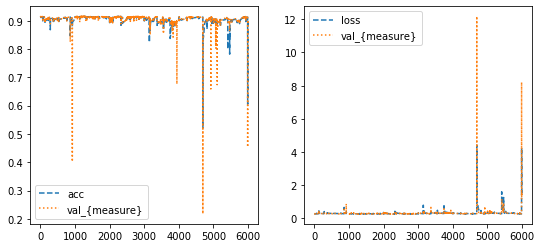

In [12]:
fig, ax = plt.subplots(ncols=2, figsize=(9, 4))

for i, measure in enumerate(['acc', 'loss']):
    ax[i].plot(df[measure], '--', label=measure);
    ax[i].plot(df[f'val_{measure}'], ':', label='val_{measure}');
    ax[i].legend();

**The player**

In [7]:
class LSTMPlayer(axl.Player):
    name = "The LSTM homie"
    classifier = {
        "memory_depth": float("inf"),
        "stochastic": True,
        "inspects_source": False,
        "manipulates_source": False,
        "manipulates_state": False,
    }

    def __init__(self, model, reshape_history_funct, opening_probability=0.70, input_length=False):
        self.model = model
        self.opening_probability = opening_probability
        self.reshape_history_function = reshape_history_funct
        if input_length:
            self.input_length = input_length
        super().__init__()
#         self.classifier["memory_depth"] = input_length
        if opening_probability in [0, 1]:
            self.classifier["stochastic"] = False
#         print(self.classifier)

    def strategy(self, opponent):
        if len(self.history) == 0:
            return random_choice(self.opening_probability)

        history = [action.value for action in opponent.history]
        
#         start = time.time()
        prediction = self.model.predict(self.reshape_history_function(history))
#         print(f'action time:{time.time() - start}')

        return axl.Action(round(prediction[0][-1][0]))

    def __repr__(self):
        return self.name

In [8]:
def reshape_history_lstm_model(history):
    return np.array(history).reshape(1, len(history), 1)



The model needs to read in by recreating the model because it was trained on hawk and on gpu

In [12]:
num_hidden_cells = 100
drop_out_rate = 0.2

In [15]:
model = Sequential()

model.add(
    LSTM(
        num_hidden_cells, return_sequences=True, input_shape=(None, 1)
    )
)

model.add(Dropout(rate=drop_out_rate))

model.add(Dense(1, activation="sigmoid"))

In [14]:
model.load_weights("hawk_output/output_lstm_top_twenty/weights-over-time.h5")

**Stochastic version against basic strategies**

In [21]:
player = LSTMPlayer(model, reshape_history_lstm_model)

In [23]:
strategies_tournament = [s() for s in axl.basic_strategies] + [player]

In [24]:
strategies_tournament

[Alternator,
 Anti Tit For Tat,
 Bully,
 Cooperator,
 Cycler DC,
 Defector,
 Grudger,
 Suspicious Tit For Tat,
 Tit For Tat,
 Win-Shift Lose-Stay: D,
 Win-Stay Lose-Shift: C,
 The LSTM homie]

In [29]:
tournament = axl.Tournament(players=strategies_tournament, turns=205, repetitions=10)

In [30]:
results = tournament.play(progress_bar=False)

action time:0.0016260147094726562
action time:0.0008099079132080078
action time:0.0008230209350585938
action time:0.0009248256683349609
action time:0.000926971435546875
action time:0.0011131763458251953
action time:0.0012598037719726562
action time:0.0026578903198242188
action time:0.0016808509826660156
action time:0.0016319751739501953
action time:0.0015571117401123047
action time:0.0014789104461669922
action time:0.0016660690307617188
action time:0.0015788078308105469
action time:0.002002239227294922
action time:0.002074718475341797
action time:0.0020279884338378906
action time:0.0020380020141601562
action time:0.0019516944885253906
action time:0.0022668838500976562
action time:0.0024127960205078125
action time:0.0024971961975097656
action time:0.0025300979614257812
action time:0.002752065658569336
action time:0.002521991729736328
action time:0.0026302337646484375
action time:0.0026328563690185547
action time:0.0028018951416015625
action time:0.0028200149536132812
action time:0.00287

action time:0.0034401416778564453
action time:0.003919124603271484
action time:0.00444793701171875
action time:0.003760099411010742
action time:0.004149198532104492
action time:0.0035588741302490234
action time:0.00391697883605957
action time:0.003895998001098633
action time:0.0036640167236328125
action time:0.004015922546386719
action time:0.0037429332733154297
action time:0.004189968109130859
action time:0.0038950443267822266
action time:0.0043332576751708984
action time:0.004394054412841797
action time:0.0040819644927978516
action time:0.004330158233642578
action time:0.004333972930908203
action time:0.0045146942138671875
action time:0.004547119140625
action time:0.0043697357177734375
action time:0.004354953765869141
action time:0.004499912261962891
action time:0.004583835601806641
action time:0.004476308822631836
action time:0.004790067672729492
action time:0.004787921905517578
action time:0.005311012268066406
action time:0.005951881408691406
action time:0.00445103645324707
action 

action time:0.009282112121582031
action time:0.007196187973022461
action time:0.006705284118652344
action time:0.006963253021240234
action time:0.006818056106567383
action time:0.006496906280517578
action time:0.006936073303222656
action time:0.006690025329589844
action time:0.006831169128417969
action time:0.007154226303100586
action time:0.0070247650146484375
action time:0.006834983825683594
action time:0.007534980773925781
action time:0.00674891471862793
action time:0.0070667266845703125
action time:0.007317066192626953
action time:0.0071108341217041016
action time:0.007089853286743164
action time:0.0074367523193359375
action time:0.008080244064331055
action time:0.0076100826263427734
action time:0.007403135299682617
action time:0.0072040557861328125
action time:0.00748896598815918
action time:0.007751941680908203
action time:0.007707357406616211
action time:0.007899761199951172
action time:0.007569074630737305
action time:0.009409189224243164
action time:0.008643865585327148
action

action time:0.009907960891723633
action time:0.010123014450073242
action time:0.009176015853881836
action time:0.009338855743408203
action time:0.00859379768371582
action time:0.009230852127075195
action time:0.00881505012512207
action time:0.009008169174194336
action time:0.009263753890991211
action time:0.00861811637878418
action time:0.009400129318237305
action time:0.008840322494506836
action time:0.009682178497314453
action time:0.008998870849609375
action time:0.009389877319335938
action time:0.009260177612304688
action time:0.008980989456176758
action time:0.009886980056762695
action time:0.009273052215576172
action time:0.010100841522216797
action time:0.009292125701904297
action time:0.009792089462280273
action time:0.011686086654663086
action time:0.01080012321472168
action time:0.009235858917236328
action time:0.010302066802978516
action time:0.009628772735595703
action time:0.010124683380126953
action time:0.009705066680908203
action time:0.010073184967041016
action time:0.

action time:0.0052258968353271484
action time:0.006017923355102539
action time:0.004484891891479492
action time:0.00503993034362793
action time:0.004972934722900391
action time:0.00519871711730957
action time:0.004678964614868164
action time:0.0043718814849853516
action time:0.0049190521240234375
action time:0.0052530765533447266
action time:0.004994869232177734
action time:0.004910707473754883
action time:0.005023002624511719
action time:0.0053288936614990234
action time:0.005113124847412109
action time:0.004902839660644531
action time:0.005053997039794922
action time:0.005727052688598633
action time:0.005697011947631836
action time:0.0049479007720947266
action time:0.005197763442993164
action time:0.005500078201293945
action time:0.00574493408203125
action time:0.005327939987182617
action time:0.005323171615600586
action time:0.00568389892578125
action time:0.0058748722076416016
action time:0.0056688785552978516
action time:0.00607609748840332
action time:0.0056912899017333984
action

action time:0.007391929626464844
action time:0.010313034057617188
action time:0.008024930953979492
action time:0.0075609683990478516
action time:0.008229970932006836
action time:0.007529020309448242
action time:0.0076138973236083984
action time:0.0077288150787353516
action time:0.007282733917236328
action time:0.008322000503540039
action time:0.007561206817626953
action time:0.008009910583496094
action time:0.008675098419189453
action time:0.008610010147094727
action time:0.008217811584472656
action time:0.008051872253417969
action time:0.00789189338684082
action time:0.008454084396362305
action time:0.008167028427124023
action time:0.008487939834594727
action time:0.008093833923339844
action time:0.008474111557006836
action time:0.008678913116455078
action time:0.008164167404174805
action time:0.008965253829956055
action time:0.009690999984741211
action time:0.009027957916259766
action time:0.008527040481567383
action time:0.008908987045288086
action time:0.008785009384155273
action t

action time:0.01164698600769043
action time:0.010056018829345703
action time:0.011161088943481445
action time:0.010661125183105469
action time:0.010042667388916016
action time:0.009557962417602539
action time:0.01017618179321289
action time:0.009713888168334961
action time:0.010373830795288086
action time:0.010003089904785156
action time:0.010193109512329102
action time:0.00996088981628418
action time:0.010298013687133789
action time:0.00993204116821289
action time:0.010149002075195312
action time:0.009987831115722656
action time:0.00991201400756836
action time:0.01071786880493164
action time:0.01001882553100586
action time:0.010368108749389648
action time:0.012207269668579102
action time:0.010756969451904297
action time:0.012036800384521484
action time:0.010332345962524414
action time:0.0008027553558349609
action time:0.0007052421569824219
action time:0.0007460117340087891
action time:0.0009608268737792969
action time:0.0009300708770751953
action time:0.0008690357208251953
action time

action time:0.0039031505584716797
action time:0.006353139877319336
action time:0.0040740966796875
action time:0.004769086837768555
action time:0.004183053970336914
action time:0.005307197570800781
action time:0.004630088806152344
action time:0.0040798187255859375
action time:0.004102945327758789
action time:0.004820108413696289
action time:0.005050182342529297
action time:0.004560947418212891
action time:0.004485130310058594
action time:0.005084037780761719
action time:0.0051000118255615234
action time:0.004603147506713867
action time:0.004640102386474609
action time:0.004665851593017578
action time:0.00467991828918457
action time:0.0051729679107666016
action time:0.005018949508666992
action time:0.0046579837799072266
action time:0.004830837249755859
action time:0.0054700374603271484
action time:0.005090951919555664
action time:0.004875898361206055
action time:0.004891157150268555
action time:0.005562782287597656
action time:0.005388975143432617
action time:0.005136966705322266
action 

action time:0.013720989227294922
action time:0.014961004257202148
action time:0.014996051788330078
action time:0.00912928581237793
action time:0.008578777313232422
action time:0.007997989654541016
action time:0.008189916610717773
action time:0.007593870162963867
action time:0.007719993591308594
action time:0.008026123046875
action time:0.00904703140258789
action time:0.012795209884643555
action time:0.008398771286010742
action time:0.008247852325439453
action time:0.008070945739746094
action time:0.008852958679199219
action time:0.011530160903930664
action time:0.008496761322021484
action time:0.00839686393737793
action time:0.007981061935424805
action time:0.00873112678527832
action time:0.00743412971496582
action time:0.008929967880249023
action time:0.008873939514160156
action time:0.008390188217163086
action time:0.008211851119995117
action time:0.007083892822265625
action time:0.007233142852783203
action time:0.007708072662353516
action time:0.00723719596862793
action time:0.00758

action time:0.011156797409057617
action time:0.013285160064697266
action time:0.01257181167602539
action time:0.01290273666381836
action time:0.012518882751464844
action time:0.010902881622314453
action time:0.010220050811767578
action time:0.009950876235961914
action time:0.010440826416015625
action time:0.009306907653808594
action time:0.009544134140014648
action time:0.009296894073486328
action time:0.009251117706298828
action time:0.010256767272949219
action time:0.009222984313964844
action time:0.009896039962768555
action time:0.009913921356201172
action time:0.01009511947631836
action time:0.009409189224243164
action time:0.01176309585571289
action time:0.010535001754760742
action time:0.011220932006835938
action time:0.009896039962768555
action time:0.010049581527709961
action time:0.009881019592285156
action time:0.010362863540649414
action time:0.009743928909301758
action time:0.010612010955810547
action time:0.010236978530883789
action time:0.010593891143798828
action time:0.

action time:0.0036280155181884766
action time:0.00335693359375
action time:0.0038521289825439453
action time:0.003213167190551758
action time:0.003482818603515625
action time:0.0033071041107177734
action time:0.003793954849243164
action time:0.004202127456665039
action time:0.0035750865936279297
action time:0.0038471221923828125
action time:0.0034241676330566406
action time:0.0033559799194335938
action time:0.0032122135162353516
action time:0.004057884216308594
action time:0.0032701492309570312
action time:0.0033180713653564453
action time:0.004301786422729492
action time:0.005736827850341797
action time:0.0037479400634765625
action time:0.004083156585693359
action time:0.0039517879486083984
action time:0.004736185073852539
action time:0.003938913345336914
action time:0.004658937454223633
action time:0.004708051681518555
action time:0.004544973373413086
action time:0.004631996154785156
action time:0.00461888313293457
action time:0.005499124526977539
action time:0.004284858703613281
act

action time:0.008496761322021484
action time:0.006411075592041016
action time:0.00757288932800293
action time:0.0055501461029052734
action time:0.007248878479003906
action time:0.006639957427978516
action time:0.005872249603271484
action time:0.008083820343017578
action time:0.006402730941772461
action time:0.00773310661315918
action time:0.006514072418212891
action time:0.007372140884399414
action time:0.0064449310302734375
action time:0.006472110748291016
action time:0.0073337554931640625
action time:0.0072820186614990234
action time:0.008723020553588867
action time:0.007235050201416016
action time:0.008281946182250977
action time:0.007178068161010742
action time:0.006800174713134766
action time:0.0059740543365478516
action time:0.006441354751586914
action time:0.006097078323364258
action time:0.0060579776763916016
action time:0.007775068283081055
action time:0.006920814514160156
action time:0.0068509578704833984
action time:0.007524013519287109
action time:0.008275985717773438
actio

action time:0.01081705093383789
action time:0.009847640991210938
action time:0.009305000305175781
action time:0.008675813674926758
action time:0.008709192276000977
action time:0.008498191833496094
action time:0.008599042892456055
action time:0.009588003158569336
action time:0.00830698013305664
action time:0.010452032089233398
action time:0.008790016174316406
action time:0.00955510139465332
action time:0.008765935897827148
action time:0.008840084075927734
action time:0.008832931518554688
action time:0.008668899536132812
action time:0.009023904800415039
action time:0.008469820022583008
action time:0.009433984756469727
action time:0.008632898330688477
action time:0.00925898551940918
action time:0.010969161987304688
action time:0.010732889175415039
action time:0.010894060134887695
action time:0.010092020034790039
action time:0.009624242782592773
action time:0.009376049041748047
action time:0.009608030319213867
action time:0.009908914566040039
action time:0.010790109634399414
action time:0.

action time:0.012888908386230469
action time:0.016680002212524414
action time:0.018101930618286133
action time:0.015678882598876953
action time:0.015144824981689453
action time:0.013828754425048828
action time:0.01262211799621582
action time:0.013483047485351562
action time:0.012879133224487305
action time:0.0008792877197265625
action time:0.0007367134094238281
action time:0.0007839202880859375
action time:0.0009930133819580078
action time:0.0009551048278808594
action time:0.0009639263153076172
action time:0.0010781288146972656
action time:0.0010280609130859375
action time:0.0012710094451904297
action time:0.0012841224670410156
action time:0.0012862682342529297
action time:0.0013270378112792969
action time:0.0013737678527832031
action time:0.0014297962188720703
action time:0.001401662826538086
action time:0.001580953598022461
action time:0.001544952392578125
action time:0.0015559196472167969
action time:0.001542806625366211
action time:0.0017650127410888672
action time:0.00182485580444

action time:0.006148099899291992
action time:0.004723072052001953
action time:0.004552125930786133
action time:0.006022930145263672
action time:0.004564046859741211
action time:0.005120992660522461
action time:0.004923105239868164
action time:0.0043909549713134766
action time:0.00569605827331543
action time:0.004963874816894531
action time:0.004567861557006836
action time:0.007335186004638672
action time:0.006975889205932617
action time:0.008793115615844727
action time:0.007285118103027344
action time:0.007445812225341797
action time:0.0065767765045166016
action time:0.007058382034301758
action time:0.0058782100677490234
action time:0.007580995559692383
action time:0.007665872573852539
action time:0.008316993713378906
action time:0.00830221176147461
action time:0.007647991180419922
action time:0.006541728973388672
action time:0.0067098140716552734
action time:0.0063970088958740234
action time:0.008156061172485352
action time:0.006415128707885742
action time:0.006659030914306641
action 

action time:0.008047103881835938
action time:0.007104158401489258
action time:0.008198022842407227
action time:0.008029937744140625
action time:0.006784200668334961
action time:0.00732111930847168
action time:0.007004976272583008
action time:0.006741762161254883
action time:0.007306098937988281
action time:0.007175922393798828
action time:0.006937742233276367
action time:0.007797956466674805
action time:0.00740504264831543
action time:0.007462978363037109
action time:0.007500886917114258
action time:0.007692098617553711
action time:0.007644176483154297
action time:0.007834196090698242
action time:0.007339000701904297
action time:0.00795602798461914
action time:0.0077822208404541016
action time:0.007297992706298828
action time:0.0077381134033203125
action time:0.007859945297241211
action time:0.008090019226074219
action time:0.008022069931030273
action time:0.00829625129699707
action time:0.009458780288696289
action time:0.008543968200683594
action time:0.008436918258666992
action time:

action time:0.011421918869018555
action time:0.012822866439819336
action time:0.009883880615234375
action time:0.010624885559082031
action time:0.009842872619628906
action time:0.010583162307739258
action time:0.010985851287841797
action time:0.011312246322631836
action time:0.010816097259521484
action time:0.010052204132080078
action time:0.010555028915405273
action time:0.011539220809936523
action time:0.010519027709960938
action time:0.010881185531616211
action time:0.010556936264038086
action time:0.010203123092651367
action time:0.01026606559753418
action time:0.011940717697143555
action time:0.010946035385131836
action time:0.011529207229614258
action time:0.01187586784362793
action time:0.012256145477294922
action time:0.011591911315917969
action time:0.011140108108520508
action time:0.011760234832763672
action time:0.010647058486938477
action time:0.011060953140258789
action time:0.011272907257080078
action time:0.01112818717956543
action time:0.011361122131347656
action time:0

action time:0.005923748016357422
action time:0.005584239959716797
action time:0.0051271915435791016
action time:0.0042531490325927734
action time:0.0042362213134765625
action time:0.004251718521118164
action time:0.0044727325439453125
action time:0.00457000732421875
action time:0.004498004913330078
action time:0.004342079162597656
action time:0.004498958587646484
action time:0.0047779083251953125
action time:0.004830121994018555
action time:0.004744052886962891
action time:0.004975795745849609
action time:0.0046961307525634766
action time:0.005178213119506836
action time:0.005810737609863281
action time:0.005240201950073242
action time:0.0050160884857177734
action time:0.005482912063598633
action time:0.005341053009033203
action time:0.005334615707397461
action time:0.00539398193359375
action time:0.005466938018798828
action time:0.0055980682373046875
action time:0.005434751510620117
action time:0.005521297454833984
action time:0.005705833435058594
action time:0.005400896072387695
acti

action time:0.007551908493041992
action time:0.006593942642211914
action time:0.007810831069946289
action time:0.007971048355102539
action time:0.006876230239868164
action time:0.006850242614746094
action time:0.007036924362182617
action time:0.006901979446411133
action time:0.006983041763305664
action time:0.007180929183959961
action time:0.007340192794799805
action time:0.0076541900634765625
action time:0.00708460807800293
action time:0.007036924362182617
action time:0.007477998733520508
action time:0.007174253463745117
action time:0.007619142532348633
action time:0.008089065551757812
action time:0.007421970367431641
action time:0.0076749324798583984
action time:0.007387876510620117
action time:0.007396221160888672
action time:0.007889032363891602
action time:0.00821995735168457
action time:0.008148908615112305
action time:0.008238792419433594
action time:0.007668972015380859
action time:0.012989044189453125
action time:0.010643959045410156
action time:0.009580850601196289
action tim

action time:0.009209871292114258
action time:0.012491941452026367
action time:0.01026296615600586
action time:0.009300947189331055
action time:0.009482145309448242
action time:0.009383916854858398
action time:0.009862899780273438
action time:0.009682893753051758
action time:0.010172367095947266
action time:0.009837865829467773
action time:0.010567188262939453
action time:0.01064610481262207
action time:0.010631799697875977
action time:0.01003408432006836
action time:0.010706901550292969
action time:0.010989665985107422
action time:0.011107683181762695
action time:0.009869098663330078
action time:0.01007699966430664
action time:0.010605096817016602
action time:0.013031005859375
action time:0.010505914688110352
action time:0.01011204719543457
action time:0.010094165802001953
action time:0.010360002517700195
action time:0.010099172592163086
action time:0.010535001754760742
action time:0.010272026062011719
action time:0.01074671745300293
action time:0.010470867156982422
action time:0.01106

action time:0.01401209831237793
action time:0.014201879501342773
action time:0.012288093566894531
action time:0.011281013488769531
action time:0.0011432170867919922
action time:0.0008759498596191406
action time:0.0007579326629638672
action time:0.0008099079132080078
action time:0.0008823871612548828
action time:0.0009300708770751953
action time:0.001062154769897461
action time:0.0011019706726074219
action time:0.0011370182037353516
action time:0.001207113265991211
action time:0.0012521743774414062
action time:0.0011839866638183594
action time:0.0012700557708740234
action time:0.0014748573303222656
action time:0.0014579296112060547
action time:0.0014770030975341797
action time:0.0017740726470947266
action time:0.0018188953399658203
action time:0.0016431808471679688
action time:0.0016629695892333984
action time:0.0018241405487060547
action time:0.0017979145050048828
action time:0.0018391609191894531
action time:0.0019040107727050781
action time:0.0019500255584716797
action time:0.0021400

action time:0.005743980407714844
action time:0.004929065704345703
action time:0.005759000778198242
action time:0.00523686408996582
action time:0.0057032108306884766
action time:0.005082130432128906
action time:0.004885196685791016
action time:0.005023002624511719
action time:0.005187034606933594
action time:0.0052509307861328125
action time:0.0050847530364990234
action time:0.0054090023040771484
action time:0.005445957183837891
action time:0.0055999755859375
action time:0.0055081844329833984
action time:0.005368947982788086
action time:0.005757808685302734
action time:0.00566411018371582
action time:0.00569605827331543
action time:0.005686044692993164
action time:0.00574803352355957
action time:0.005535125732421875
action time:0.0058171749114990234
action time:0.00633692741394043
action time:0.006062030792236328
action time:0.005742073059082031
action time:0.00597381591796875
action time:0.0063800811767578125
action time:0.0064008235931396484
action time:0.0064890384674072266
action ti

action time:0.008856058120727539
action time:0.008738040924072266
action time:0.007621288299560547
action time:0.007382869720458984
action time:0.0073359012603759766
action time:0.0070819854736328125
action time:0.0073032379150390625
action time:0.007447957992553711
action time:0.007264852523803711
action time:0.00751805305480957
action time:0.007508039474487305
action time:0.007554054260253906
action time:0.007837057113647461
action time:0.008018970489501953
action time:0.008127212524414062
action time:0.008395671844482422
action time:0.0077669620513916016
action time:0.008076906204223633
action time:0.00851583480834961
action time:0.008279085159301758
action time:0.00856781005859375
action time:0.009159088134765625
action time:0.008614063262939453
action time:0.008814096450805664
action time:0.008740901947021484
action time:0.009425878524780273
action time:0.008701086044311523
action time:0.010146141052246094
action time:0.009777069091796875
action time:0.009705066680908203
action ti

action time:0.011763811111450195
action time:0.011452913284301758
action time:0.01175999641418457
action time:0.009986162185668945
action time:0.010181903839111328
action time:0.010796070098876953
action time:0.010474920272827148
action time:0.010137081146240234
action time:0.010291814804077148
action time:0.011126041412353516
action time:0.010468244552612305
action time:0.011516094207763672
action time:0.01180887222290039
action time:0.011858940124511719
action time:0.01106572151184082
action time:0.012108087539672852
action time:0.010836124420166016
action time:0.01027989387512207
action time:0.012228250503540039
action time:0.012369155883789062
action time:0.011822700500488281
action time:0.010604143142700195
action time:0.011465072631835938
action time:0.011577844619750977
action time:0.012246131896972656
action time:0.011684894561767578
action time:0.011372089385986328
action time:0.01129007339477539
action time:0.01217508316040039
action time:0.012324810028076172
action time:0.01

action time:0.003991127014160156
action time:0.005221128463745117
action time:0.00454401969909668
action time:0.004897117614746094
action time:0.0044558048248291016
action time:0.0051991939544677734
action time:0.004557132720947266
action time:0.004311084747314453
action time:0.004239797592163086
action time:0.004453182220458984
action time:0.004593849182128906
action time:0.0048313140869140625
action time:0.004929065704345703
action time:0.005211830139160156
action time:0.005195140838623047
action time:0.005034923553466797
action time:0.004729032516479492
action time:0.00506901741027832
action time:0.0054171085357666016
action time:0.005374908447265625
action time:0.004860877990722656
action time:0.004841804504394531
action time:0.005174875259399414
action time:0.005011796951293945
action time:0.0051479339599609375
action time:0.005457162857055664
action time:0.005487203598022461
action time:0.005404949188232422
action time:0.005293130874633789
action time:0.0054779052734375
action ti

action time:0.0074310302734375
action time:0.008300065994262695
action time:0.00767207145690918
action time:0.007608175277709961
action time:0.0070002079010009766
action time:0.006958961486816406
action time:0.006956815719604492
action time:0.00681614875793457
action time:0.0073337554931640625
action time:0.006794929504394531
action time:0.007312774658203125
action time:0.007257938385009766
action time:0.006894111633300781
action time:0.007111787796020508
action time:0.007429838180541992
action time:0.007383108139038086
action time:0.0071239471435546875
action time:0.007574796676635742
action time:0.007668972015380859
action time:0.007447957992553711
action time:0.007354736328125
action time:0.0075261592864990234
action time:0.007426023483276367
action time:0.007341861724853516
action time:0.007604122161865234
action time:0.007803678512573242
action time:0.007986068725585938
action time:0.008682966232299805
action time:0.008782148361206055
action time:0.008486032485961914
action time:0

action time:0.010998964309692383
action time:0.010931968688964844
action time:0.009926319122314453
action time:0.00962519645690918
action time:0.010027647018432617
action time:0.010303974151611328
action time:0.009856939315795898
action time:0.010272741317749023
action time:0.009924173355102539
action time:0.010493993759155273
action time:0.010203838348388672
action time:0.009972095489501953
action time:0.010637044906616211
action time:0.011027097702026367
action time:0.010943889617919922
action time:0.011265039443969727
action time:0.011324882507324219
action time:0.011058330535888672
action time:0.010583877563476562
action time:0.01139688491821289
action time:0.011844158172607422
action time:0.01267695426940918
action time:0.011522769927978516
action time:0.011216878890991211
action time:0.01111292839050293
action time:0.011597156524658203
action time:0.012063026428222656
action time:0.011161088943481445
action time:0.011984109878540039
action time:0.010741949081420898
action time:0.

action time:0.0053369998931884766
action time:0.004765033721923828
action time:0.004415988922119141
action time:0.004829883575439453
action time:0.0045201778411865234
action time:0.004865884780883789
action time:0.004290103912353516
action time:0.004357099533081055
action time:0.004600048065185547
action time:0.004527091979980469
action time:0.004723072052001953
action time:0.004686832427978516
action time:0.004569053649902344
action time:0.004742145538330078
action time:0.004753828048706055
action time:0.00501704216003418
action time:0.004734992980957031
action time:0.005120038986206055
action time:0.0051097869873046875
action time:0.005099773406982422
action time:0.005055904388427734
action time:0.004879951477050781
action time:0.005286693572998047
action time:0.005548000335693359
action time:0.004977226257324219
action time:0.005177021026611328
action time:0.0054149627685546875
action time:0.005279064178466797
action time:0.005394935607910156
action time:0.005792856216430664
action 

action time:0.006729841232299805
action time:0.009613990783691406
action time:0.007447957992553711
action time:0.0071218013763427734
action time:0.006888151168823242
action time:0.006589174270629883
action time:0.007100105285644531
action time:0.006742000579833984
action time:0.007088899612426758
action time:0.006966114044189453
action time:0.006783008575439453
action time:0.0068819522857666016
action time:0.007097005844116211
action time:0.0070230960845947266
action time:0.00690913200378418
action time:0.0074291229248046875
action time:0.007428169250488281
action time:0.007416963577270508
action time:0.007332324981689453
action time:0.007875680923461914
action time:0.00731205940246582
action time:0.008126974105834961
action time:0.008877992630004883
action time:0.00786590576171875
action time:0.007707834243774414
action time:0.0076253414154052734
action time:0.007860898971557617
action time:0.009124994277954102
action time:0.009240865707397461
action time:0.008216142654418945
action t

action time:0.011601924896240234
action time:0.011289119720458984
action time:0.010152101516723633
action time:0.010694026947021484
action time:0.01020503044128418
action time:0.0102081298828125
action time:0.00933384895324707
action time:0.010293960571289062
action time:0.010534048080444336
action time:0.010668039321899414
action time:0.011072874069213867
action time:0.010907173156738281
action time:0.010987043380737305
action time:0.011329889297485352
action time:0.010064125061035156
action time:0.009962797164916992
action time:0.009531974792480469
action time:0.009630918502807617
action time:0.009757041931152344
action time:0.011357784271240234
action time:0.01114511489868164
action time:0.012460708618164062
action time:0.010425806045532227
action time:0.011384010314941406
action time:0.010469913482666016
action time:0.010506868362426758
action time:0.010077953338623047
action time:0.01070713996887207
action time:0.010933637619018555
action time:0.011326074600219727
action time:0.01

action time:0.004153728485107422
action time:0.004042148590087891
action time:0.003419160842895508
action time:0.004302978515625
action time:0.003704071044921875
action time:0.0043697357177734375
action time:0.003854036331176758
action time:0.003570079803466797
action time:0.0035767555236816406
action time:0.0038111209869384766
action time:0.0037801265716552734
action time:0.0040781497955322266
action time:0.0038957595825195312
action time:0.0042171478271484375
action time:0.003757953643798828
action time:0.003923892974853516
action time:0.004261016845703125
action time:0.0040280818939208984
action time:0.004199981689453125
action time:0.004225015640258789
action time:0.004281044006347656
action time:0.0043218135833740234
action time:0.004293680191040039
action time:0.004503011703491211
action time:0.004812002182006836
action time:0.004693031311035156
action time:0.004930973052978516
action time:0.004548072814941406
action time:0.004564046859741211
action time:0.0045969486236572266
act

action time:0.007214069366455078
action time:0.009279966354370117
action time:0.007163047790527344
action time:0.007423877716064453
action time:0.0069103240966796875
action time:0.007044076919555664
action time:0.006592750549316406
action time:0.00690007209777832
action time:0.006875038146972656
action time:0.006676197052001953
action time:0.006721973419189453
action time:0.007027864456176758
action time:0.007147789001464844
action time:0.007032871246337891
action time:0.007381916046142578
action time:0.007262229919433594
action time:0.007238149642944336
action time:0.0074269771575927734
action time:0.0074100494384765625
action time:0.0077190399169921875
action time:0.0075299739837646484
action time:0.008333921432495117
action time:0.00785684585571289
action time:0.007858037948608398
action time:0.008079290390014648
action time:0.007569074630737305
action time:0.007874011993408203
action time:0.010148048400878906
action time:0.00978398323059082
action time:0.008338212966918945
action t

action time:0.009516000747680664
action time:0.011237144470214844
action time:0.010331153869628906
action time:0.010333061218261719
action time:0.010421037673950195
action time:0.010903120040893555
action time:0.011006832122802734
action time:0.011008024215698242
action time:0.010347127914428711
action time:0.010129213333129883
action time:0.010210752487182617
action time:0.009793996810913086
action time:0.010409116744995117
action time:0.010812759399414062
action time:0.010267972946166992
action time:0.011211156845092773
action time:0.01063680648803711
action time:0.010071039199829102
action time:0.010017871856689453
action time:0.010205984115600586
action time:0.01158285140991211
action time:0.011436939239501953
action time:0.011109113693237305
action time:0.010419845581054688
action time:0.010972261428833008
action time:0.011617183685302734
action time:0.010804891586303711
action time:0.01090693473815918
action time:0.011173009872436523
action time:0.010951757431030273
action time:0

action time:0.005182981491088867
action time:0.004878044128417969
action time:0.004028797149658203
action time:0.0037908554077148438
action time:0.004414081573486328
action time:0.0039899349212646484
action time:0.0036678314208984375
action time:0.0038950443267822266
action time:0.0044400691986083984
action time:0.004089832305908203
action time:0.004045724868774414
action time:0.004119157791137695
action time:0.0038781166076660156
action time:0.004539012908935547
action time:0.0043299198150634766
action time:0.004058837890625
action time:0.004525899887084961
action time:0.004683971405029297
action time:0.004377126693725586
action time:0.0048618316650390625
action time:0.005090951919555664
action time:0.005051851272583008
action time:0.005464076995849609
action time:0.004937887191772461
action time:0.005278110504150391
action time:0.005006074905395508
action time:0.0049359798431396484
action time:0.004816770553588867
action time:0.005117893218994141
action time:0.005572080612182617
acti

action time:0.008453130722045898
action time:0.008890867233276367
action time:0.009229183197021484
action time:0.008196830749511719
action time:0.008152961730957031
action time:0.008524894714355469
action time:0.00834512710571289
action time:0.008548736572265625
action time:0.008440017700195312
action time:0.008033990859985352
action time:0.007879018783569336
action time:0.008942127227783203
action time:0.008419036865234375
action time:0.008013725280761719
action time:0.007861137390136719
action time:0.010192155838012695
action time:0.00837397575378418
action time:0.009596109390258789
action time:0.008793115615844727
action time:0.008980035781860352
action time:0.008791923522949219
action time:0.009744882583618164
action time:0.01009821891784668
action time:0.012050867080688477
action time:0.013154983520507812
action time:0.012290716171264648
action time:0.011328935623168945
action time:0.016795873641967773
action time:0.013279914855957031
action time:0.01322484016418457
action time:0.

action time:0.01219630241394043
action time:0.010903120040893555
action time:0.011771202087402344
action time:0.011691093444824219
action time:0.01217508316040039
action time:0.010653018951416016
action time:0.0118560791015625
action time:0.011218786239624023
action time:0.012086153030395508
action time:0.011288166046142578
action time:0.011358022689819336
action time:0.011394023895263672
action time:0.011935949325561523
action time:0.011742830276489258
action time:0.010934114456176758
action time:0.012757062911987305
action time:0.012598037719726562
action time:0.015323162078857422
action time:0.014630794525146484
action time:0.012778043746948242
action time:0.013624191284179688
action time:0.013598918914794922
action time:0.013010263442993164
action time:0.012668132781982422
action time:0.01386404037475586
action time:0.01256704330444336
action time:0.013275861740112305
action time:0.012772083282470703
action time:0.013581037521362305
action time:0.013073205947875977
action time:0.01

action time:0.015249013900756836
action time:0.00273895263671875
action time:0.0012021064758300781
action time:0.0010578632354736328
action time:0.0010418891906738281
action time:0.0013949871063232422
action time:0.0011420249938964844
action time:0.001154184341430664
action time:0.0016791820526123047
action time:0.0016541481018066406
action time:0.0016078948974609375
action time:0.0017609596252441406
action time:0.001458883285522461
action time:0.0015511512756347656
action time:0.0015401840209960938
action time:0.0017931461334228516
action time:0.00164794921875
action time:0.002084016799926758
action time:0.0020132064819335938
action time:0.0026848316192626953
action time:0.0023908615112304688
action time:0.0022161006927490234
action time:0.0027070045471191406
action time:0.0023860931396484375
action time:0.002686023712158203
action time:0.0022840499877929688
action time:0.002446889877319336
action time:0.0026183128356933594
action time:0.002643108367919922
action time:0.00268197059631

action time:0.004821062088012695
action time:0.0051310062408447266
action time:0.005196809768676758
action time:0.004776954650878906
action time:0.005129814147949219
action time:0.004464149475097656
action time:0.004349946975708008
action time:0.004560232162475586
action time:0.00466609001159668
action time:0.0049479007720947266
action time:0.004681825637817383
action time:0.0047588348388671875
action time:0.004450798034667969
action time:0.005090951919555664
action time:0.005179882049560547
action time:0.00482487678527832
action time:0.0049059391021728516
action time:0.005246877670288086
action time:0.004860877990722656
action time:0.005087852478027344
action time:0.005293130874633789
action time:0.005338191986083984
action time:0.005407094955444336
action time:0.005591154098510742
action time:0.00539708137512207
action time:0.005928993225097656
action time:0.005442142486572266
action time:0.0053730010986328125
action time:0.0057010650634765625
action time:0.0056078433990478516
action

action time:0.010057926177978516
action time:0.008332014083862305
action time:0.007896900177001953
action time:0.008173704147338867
action time:0.008339166641235352
action time:0.008255243301391602
action time:0.008605003356933594
action time:0.008886098861694336
action time:0.008806705474853516
action time:0.008255243301391602
action time:0.008133172988891602
action time:0.007909774780273438
action time:0.008604764938354492
action time:0.008038997650146484
action time:0.008170843124389648
action time:0.00828099250793457
action time:0.008646011352539062
action time:0.009275197982788086
action time:0.008177995681762695
action time:0.009500265121459961
action time:0.008957862854003906
action time:0.009185075759887695
action time:0.009078025817871094
action time:0.009385108947753906
action time:0.01006007194519043
action time:0.009891033172607422
action time:0.010165691375732422
action time:0.00929880142211914
action time:0.009454965591430664
action time:0.009270191192626953
action time:0

action time:0.010628700256347656
action time:0.013800859451293945
action time:0.010677099227905273
action time:0.011491060256958008
action time:0.011090993881225586
action time:0.011590003967285156
action time:0.012228250503540039
action time:0.011640071868896484
action time:0.010847806930541992
action time:0.010779857635498047
action time:0.011412858963012695
action time:0.010824918746948242
action time:0.010659217834472656
action time:0.011162996292114258
action time:0.012358903884887695
action time:0.012732982635498047
action time:0.012497901916503906
action time:0.013135910034179688
action time:0.012180328369140625
action time:0.01275491714477539
action time:0.011347055435180664
action time:0.012066125869750977
action time:0.01165628433227539
action time:0.012930154800415039
action time:0.01225900650024414
action time:0.011779069900512695
action time:0.01186680793762207
action time:0.012427091598510742
action time:0.012947320938110352
action time:0.01191401481628418
action time:0.0

action time:0.0043680667877197266
action time:0.00642704963684082
action time:0.005429983139038086
action time:0.005418062210083008
action time:0.004845142364501953
action time:0.005178213119506836
action time:0.0051250457763671875
action time:0.005063772201538086
action time:0.004950046539306641
action time:0.005387067794799805
action time:0.005148887634277344
action time:0.0052127838134765625
action time:0.005068063735961914
action time:0.005412101745605469
action time:0.005377054214477539
action time:0.0056149959564208984
action time:0.0055119991302490234
action time:0.0054509639739990234
action time:0.005510807037353516
action time:0.005404949188232422
action time:0.005909919738769531
action time:0.005781888961791992
action time:0.005742073059082031
action time:0.005657196044921875
action time:0.006242036819458008
action time:0.006067991256713867
action time:0.006078958511352539
action time:0.00580906867980957
action time:0.006398200988769531
action time:0.006310224533081055
action

action time:0.010528087615966797
action time:0.009145021438598633
action time:0.008709907531738281
action time:0.00884103775024414
action time:0.008365154266357422
action time:0.008749008178710938
action time:0.008463144302368164
action time:0.008460044860839844
action time:0.008719682693481445
action time:0.009503841400146484
action time:0.008401155471801758
action time:0.008561134338378906
action time:0.008201837539672852
action time:0.008841991424560547
action time:0.008442163467407227
action time:0.009028196334838867
action time:0.00975799560546875
action time:0.01034092903137207
action time:0.009515047073364258
action time:0.009196758270263672
action time:0.01022791862487793
action time:0.009542226791381836
action time:0.010009050369262695
action time:0.011802196502685547
action time:0.010087966918945312
action time:0.009327888488769531
action time:0.010119915008544922
action time:0.009704828262329102
action time:0.009691953659057617
action time:0.009617090225219727
action time:0.

action time:0.01209712028503418
action time:0.01532602310180664
action time:0.013041019439697266
action time:0.012063980102539062
action time:0.011540889739990234
action time:0.01290583610534668
action time:0.011811017990112305
action time:0.012379884719848633
action time:0.012691736221313477
action time:0.013644218444824219
action time:0.013136148452758789
action time:0.011608123779296875
action time:0.011461973190307617
action time:0.011621236801147461
action time:0.012281179428100586
action time:0.012799978256225586
action time:0.013108968734741211
action time:0.01395416259765625
action time:0.013423919677734375
action time:0.013937950134277344
action time:0.0008640289306640625
action time:0.0007169246673583984
action time:0.0008218288421630859
action time:0.0008461475372314453
action time:0.001085042953491211
action time:0.0010528564453125
action time:0.0011148452758789062
action time:0.0011470317840576172
action time:0.0012547969818115234
action time:0.0013480186462402344
action t

action time:0.006091117858886719
action time:0.006907939910888672
action time:0.0047299861907958984
action time:0.004667997360229492
action time:0.004555940628051758
action time:0.004821062088012695
action time:0.00507807731628418
action time:0.00504612922668457
action time:0.0048639774322509766
action time:0.004706144332885742
action time:0.005004167556762695
action time:0.0048351287841796875
action time:0.004875898361206055
action time:0.005076885223388672
action time:0.0048487186431884766
action time:0.005177021026611328
action time:0.004778861999511719
action time:0.0055828094482421875
action time:0.005360126495361328
action time:0.0050470829010009766
action time:0.005152702331542969
action time:0.005576133728027344
action time:0.005499839782714844
action time:0.0058269500732421875
action time:0.0054988861083984375
action time:0.005507707595825195
action time:0.005864143371582031
action time:0.005972862243652344
action time:0.006314992904663086
action time:0.005736827850341797
acti

action time:0.010417699813842773
action time:0.008779048919677734
action time:0.00811004638671875
action time:0.007759809494018555
action time:0.008444070816040039
action time:0.007951736450195312
action time:0.008074045181274414
action time:0.007850408554077148
action time:0.008232831954956055
action time:0.007928848266601562
action time:0.008783102035522461
action time:0.008262872695922852
action time:0.008536815643310547
action time:0.008311033248901367
action time:0.00856781005859375
action time:0.00822901725769043
action time:0.00860595703125
action time:0.008630037307739258
action time:0.008899927139282227
action time:0.00896596908569336
action time:0.009006977081298828
action time:0.008804082870483398
action time:0.008888959884643555
action time:0.009555816650390625
action time:0.010753870010375977
action time:0.009855031967163086
action time:0.01004481315612793
action time:0.009649991989135742
action time:0.01031494140625
action time:0.00997471809387207
action time:0.0108289718

action time:0.011419296264648438
action time:0.01275491714477539
action time:0.012775897979736328
action time:0.011715888977050781
action time:0.01141667366027832
action time:0.010953187942504883
action time:0.010977983474731445
action time:0.011379003524780273
action time:0.011523962020874023
action time:0.011915206909179688
action time:0.01194906234741211
action time:0.011559247970581055
action time:0.01291799545288086
action time:0.013384103775024414
action time:0.012557744979858398
action time:0.011897087097167969
action time:0.011775970458984375
action time:0.012471675872802734
action time:0.012986898422241211
action time:0.013400077819824219
action time:0.012586116790771484
action time:0.012468814849853516
action time:0.01220393180847168
action time:0.012095928192138672
action time:0.012701988220214844
action time:0.0007741451263427734
action time:0.0007069110870361328
action time:0.0007460117340087891
action time:0.0008738040924072266
action time:0.0009539127349853516
action tim

action time:0.006105184555053711
action time:0.006394147872924805
action time:0.006536006927490234
action time:0.005651950836181641
action time:0.005533933639526367
action time:0.005342960357666016
action time:0.005629301071166992
action time:0.0056459903717041016
action time:0.0054018497467041016
action time:0.005233049392700195
action time:0.005410194396972656
action time:0.005984067916870117
action time:0.005769968032836914
action time:0.005844831466674805
action time:0.005869865417480469
action time:0.006220817565917969
action time:0.005667209625244141
action time:0.0062558650970458984
action time:0.005877017974853516
action time:0.006373167037963867
action time:0.006334066390991211
action time:0.0068209171295166016
action time:0.00691986083984375
action time:0.006680011749267578
action time:0.00613093376159668
action time:0.007064104080200195
action time:0.006429910659790039
action time:0.00637507438659668
action time:0.006416797637939453
action time:0.006274223327636719
action ti

action time:0.008873939514160156
action time:0.009092092514038086
action time:0.008829832077026367
action time:0.009135961532592773
action time:0.008328914642333984
action time:0.008343935012817383
action time:0.008397102355957031
action time:0.008538007736206055
action time:0.008877038955688477
action time:0.008845090866088867
action time:0.008908987045288086
action time:0.009095907211303711
action time:0.008610010147094727
action time:0.009341239929199219
action time:0.009418010711669922
action time:0.008419036865234375
action time:0.008729696273803711
action time:0.008495092391967773
action time:0.008873939514160156
action time:0.009202003479003906
action time:0.009735822677612305
action time:0.00988626480102539
action time:0.011133193969726562
action time:0.0125732421875
action time:0.010906219482421875
action time:0.009020090103149414
action time:0.009163141250610352
action time:0.00912928581237793
action time:0.009603738784790039
action time:0.009531259536743164
action time:0.009

action time:0.012708187103271484
action time:0.01218104362487793
action time:0.012005090713500977
action time:0.011241912841796875
action time:0.011815786361694336
action time:0.012542009353637695
action time:0.012851953506469727
action time:0.012456893920898438
action time:0.01146388053894043
action time:0.011689901351928711
action time:0.012199878692626953
action time:0.011502981185913086
action time:0.011203765869140625
action time:0.011823177337646484
action time:0.012196063995361328
action time:0.012275934219360352
action time:0.012050151824951172
action time:0.01397085189819336
action time:0.012225151062011719
action time:0.013019084930419922
action time:0.012788057327270508
action time:0.013426065444946289
action time:0.012942075729370117
action time:0.012662887573242188
action time:0.0007853507995605469
action time:0.0007691383361816406
action time:0.0008149147033691406
action time:0.0008170604705810547
action time:0.0009748935699462891
action time:0.0009548664093017578
action 

action time:0.003921985626220703
action time:0.004866123199462891
action time:0.00410914421081543
action time:0.004498004913330078
action time:0.0042040348052978516
action time:0.00532078742980957
action time:0.004231929779052734
action time:0.0040967464447021484
action time:0.004487037658691406
action time:0.004786968231201172
action time:0.004574775695800781
action time:0.004309892654418945
action time:0.004186868667602539
action time:0.004703044891357422
action time:0.0047760009765625
action time:0.004891872406005859
action time:0.00473785400390625
action time:0.0052869319915771484
action time:0.00540614128112793
action time:0.0052700042724609375
action time:0.00563502311706543
action time:0.004797935485839844
action time:0.00513005256652832
action time:0.0050201416015625
action time:0.004940032958984375
action time:0.0051958560943603516
action time:0.0054950714111328125
action time:0.005334138870239258
action time:0.005431175231933594
action time:0.0057830810546875
action time:0.00

action time:0.007633209228515625
action time:0.007377147674560547
action time:0.00898599624633789
action time:0.007814168930053711
action time:0.00697016716003418
action time:0.007046937942504883
action time:0.007450103759765625
action time:0.00722193717956543
action time:0.006947040557861328
action time:0.00721287727355957
action time:0.007387876510620117
action time:0.0074481964111328125
action time:0.0076029300689697266
action time:0.007877111434936523
action time:0.007956981658935547
action time:0.0077321529388427734
action time:0.007533073425292969
action time:0.008276939392089844
action time:0.0076122283935546875
action time:0.007551908493041992
action time:0.008116960525512695
action time:0.007990837097167969
action time:0.007772922515869141
action time:0.008198261260986328
action time:0.007862091064453125
action time:0.00826406478881836
action time:0.009123086929321289
action time:0.009174108505249023
action time:0.010218143463134766
action time:0.008548974990844727
action time

action time:0.010499000549316406
action time:0.011497020721435547
action time:0.009750127792358398
action time:0.009343862533569336
action time:0.009320974349975586
action time:0.009570121765136719
action time:0.009377002716064453
action time:0.010249137878417969
action time:0.009454965591430664
action time:0.00986480712890625
action time:0.009846925735473633
action time:0.010358095169067383
action time:0.010202884674072266
action time:0.010014057159423828
action time:0.009945869445800781
action time:0.010101795196533203
action time:0.010064125061035156
action time:0.01108694076538086
action time:0.010676860809326172
action time:0.010282039642333984
action time:0.013200044631958008
action time:0.011345863342285156
action time:0.012429952621459961
action time:0.010527372360229492
action time:0.010622024536132812
action time:0.01071786880493164
action time:0.01063394546508789
action time:0.010540008544921875
action time:0.010445117950439453
action time:0.01051187515258789
action time:0.0

action time:0.014661073684692383
action time:0.015677928924560547
action time:0.011511802673339844
action time:0.011770009994506836
action time:0.0007190704345703125
action time:0.00074005126953125
action time:0.0008280277252197266
action time:0.0008337497711181641
action time:0.0008509159088134766
action time:0.0009129047393798828
action time:0.0009989738464355469
action time:0.001013040542602539
action time:0.0011692047119140625
action time:0.0011162757873535156
action time:0.0011849403381347656
action time:0.0012860298156738281
action time:0.0013818740844726562
action time:0.0014102458953857422
action time:0.0015919208526611328
action time:0.0015070438385009766
action time:0.001608133316040039
action time:0.0016078948974609375
action time:0.0016970634460449219
action time:0.0018932819366455078
action time:0.0018541812896728516
action time:0.0018973350524902344
action time:0.0020401477813720703
action time:0.0020797252655029297
action time:0.002020120620727539
action time:0.002310991

action time:0.005182027816772461
action time:0.00533294677734375
action time:0.004433870315551758
action time:0.004462003707885742
action time:0.004611015319824219
action time:0.004408121109008789
action time:0.004312992095947266
action time:0.0046498775482177734
action time:0.0047817230224609375
action time:0.004394054412841797
action time:0.004518032073974609
action time:0.004812955856323242
action time:0.00463104248046875
action time:0.004554033279418945
action time:0.005076169967651367
action time:0.004743814468383789
action time:0.005082130432128906
action time:0.005438089370727539
action time:0.005518198013305664
action time:0.005423069000244141
action time:0.0052449703216552734
action time:0.0055391788482666016
action time:0.006142139434814453
action time:0.005288839340209961
action time:0.005194187164306641
action time:0.005431175231933594
action time:0.005735874176025391
action time:0.005421876907348633
action time:0.005401134490966797
action time:0.005630970001220703
action t

action time:0.007482051849365234
action time:0.009579658508300781
action time:0.008167028427124023
action time:0.008068084716796875
action time:0.008138895034790039
action time:0.008404016494750977
action time:0.008255958557128906
action time:0.008359909057617188
action time:0.008479118347167969
action time:0.008300065994262695
action time:0.008347749710083008
action time:0.008147001266479492
action time:0.007356166839599609
action time:0.007196187973022461
action time:0.0076122283935546875
action time:0.007609128952026367
action time:0.007566690444946289
action time:0.008172750473022461
action time:0.008343219757080078
action time:0.007931232452392578
action time:0.007857799530029297
action time:0.008424043655395508
action time:0.008399009704589844
action time:0.008682727813720703
action time:0.009132146835327148
action time:0.011342048645019531
action time:0.010253667831420898
action time:0.008632659912109375
action time:0.008480072021484375
action time:0.009402990341186523
action ti

action time:0.011897087097167969
action time:0.010996103286743164
action time:0.010002851486206055
action time:0.009680986404418945
action time:0.010128021240234375
action time:0.009830951690673828
action time:0.009714126586914062
action time:0.010606050491333008
action time:0.009778976440429688
action time:0.010042905807495117
action time:0.011175155639648438
action time:0.011449098587036133
action time:0.011538028717041016
action time:0.011750936508178711
action time:0.011858940124511719
action time:0.012103080749511719
action time:0.010539054870605469
action time:0.010174989700317383
action time:0.010163307189941406
action time:0.011554956436157227
action time:0.011410951614379883
action time:0.011063098907470703
action time:0.011059045791625977
action time:0.011279106140136719
action time:0.012547016143798828
action time:0.012221097946166992
action time:0.012759923934936523
action time:0.011340141296386719
action time:0.010866880416870117
action time:0.01094818115234375
action time

action time:0.005059957504272461
action time:0.0049588680267333984
action time:0.003773927688598633
action time:0.0042612552642822266
action time:0.003885030746459961
action time:0.0037250518798828125
action time:0.0037980079650878906
action time:0.004220008850097656
action time:0.003957986831665039
action time:0.003900289535522461
action time:0.004037141799926758
action time:0.0041201114654541016
action time:0.004198789596557617
action time:0.004559993743896484
action time:0.0044019222259521484
action time:0.0045969486236572266
action time:0.004831075668334961
action time:0.004366159439086914
action time:0.004506111145019531
action time:0.00506591796875
action time:0.004881858825683594
action time:0.0051021575927734375
action time:0.0050449371337890625
action time:0.00514674186706543
action time:0.0046939849853515625
action time:0.004651069641113281
action time:0.0049591064453125
action time:0.005423069000244141
action time:0.0052490234375
action time:0.0048370361328125
action time:0.

action time:0.009747982025146484
action time:0.008213996887207031
action time:0.007923126220703125
action time:0.008153915405273438
action time:0.008198261260986328
action time:0.008169889450073242
action time:0.00830078125
action time:0.008175849914550781
action time:0.007644176483154297
action time:0.008285999298095703
action time:0.008914947509765625
action time:0.008151054382324219
action time:0.007756233215332031
action time:0.008426904678344727
action time:0.00825190544128418
action time:0.0089569091796875
action time:0.008416175842285156
action time:0.008091926574707031
action time:0.008243083953857422
action time:0.007963895797729492
action time:0.008974075317382812
action time:0.009177684783935547
action time:0.0093841552734375
action time:0.009613990783691406
action time:0.010828971862792969
action time:0.010627269744873047
action time:0.009737014770507812
action time:0.008881092071533203
action time:0.009428977966308594
action time:0.009088993072509766
action time:0.00870203

action time:0.010760784149169922
action time:0.012866020202636719
action time:0.01188206672668457
action time:0.011237144470214844
action time:0.011394977569580078
action time:0.009665727615356445
action time:0.009888172149658203
action time:0.011229753494262695
action time:0.010872840881347656
action time:0.011924982070922852
action time:0.011886119842529297
action time:0.01207590103149414
action time:0.012225151062011719
action time:0.012188911437988281
action time:0.010972976684570312
action time:0.010022163391113281
action time:0.010284900665283203
action time:0.010258913040161133
action time:0.011874675750732422
action time:0.014045953750610352
action time:0.010874032974243164
action time:0.01110696792602539
action time:0.011039972305297852
action time:0.011016368865966797
action time:0.010885953903198242
action time:0.011672735214233398
action time:0.011046171188354492
action time:0.011823892593383789
action time:0.01114511489868164
action time:0.011223077774047852
action time:0.

action time:0.005666017532348633
action time:0.004912853240966797
action time:0.004611015319824219
action time:0.00556182861328125
action time:0.005447864532470703
action time:0.004842042922973633
action time:0.004925966262817383
action time:0.0050029754638671875
action time:0.004842996597290039
action time:0.004748106002807617
action time:0.004837989807128906
action time:0.005023002624511719
action time:0.005339145660400391
action time:0.005219936370849609
action time:0.004927158355712891
action time:0.005278825759887695
action time:0.005628824234008789
action time:0.00545501708984375
action time:0.005869150161743164
action time:0.005812883377075195
action time:0.005962848663330078
action time:0.005944252014160156
action time:0.005731105804443359
action time:0.00539398193359375
action time:0.00573420524597168
action time:0.006027936935424805
action time:0.0061910152435302734
action time:0.00622105598449707
action time:0.005519866943359375
action time:0.006204366683959961
action time:0

action time:0.008316755294799805
action time:0.008533000946044922
action time:0.008996963500976562
action time:0.009265899658203125
action time:0.007963180541992188
action time:0.008131265640258789
action time:0.008456230163574219
action time:0.008142948150634766
action time:0.008070230484008789
action time:0.008516788482666016
action time:0.00893402099609375
action time:0.009176015853881836
action time:0.0096588134765625
action time:0.009030818939208984
action time:0.009305953979492188
action time:0.00932002067565918
action time:0.009662151336669922
action time:0.008846044540405273
action time:0.00855708122253418
action time:0.009306907653808594
action time:0.009483098983764648
action time:0.008877038955688477
action time:0.00864410400390625
action time:0.011142730712890625
action time:0.010390996932983398
action time:0.010952234268188477
action time:0.009745121002197266
action time:0.009979963302612305
action time:0.010426998138427734
action time:0.010513067245483398
action time:0.01

action time:0.013406991958618164
action time:0.012612104415893555
action time:0.012410879135131836
action time:0.012530088424682617
action time:0.012421846389770508
action time:0.012578964233398438
action time:0.012880086898803711
action time:0.013051033020019531
action time:0.01310276985168457
action time:0.013233184814453125
action time:0.013113021850585938
action time:0.011642217636108398
action time:0.010915040969848633
action time:0.011077880859375
action time:0.012157917022705078
action time:0.013010263442993164
action time:0.013659954071044922
action time:0.013706684112548828
action time:0.013022184371948242
action time:0.013000011444091797
action time:0.012111186981201172
action time:0.012486934661865234
action time:0.01194310188293457
action time:0.0008928775787353516
action time:0.0008220672607421875
action time:0.0007920265197753906
action time:0.0009241104125976562
action time:0.0008518695831298828
action time:0.0009658336639404297
action time:0.0010628700256347656
action t

action time:0.0033130645751953125
action time:0.0046961307525634766
action time:0.0034859180450439453
action time:0.0034377574920654297
action time:0.003480672836303711
action time:0.0040929317474365234
action time:0.00407719612121582
action time:0.003695249557495117
action time:0.004067182540893555
action time:0.0037338733673095703
action time:0.003757953643798828
action time:0.00399327278137207
action time:0.003942012786865234
action time:0.0039119720458984375
action time:0.003820180892944336
action time:0.00376129150390625
action time:0.003833293914794922
action time:0.003751993179321289
action time:0.004231929779052734
action time:0.003907918930053711
action time:0.004548072814941406
action time:0.00436091423034668
action time:0.0041751861572265625
action time:0.004448890686035156
action time:0.004672050476074219
action time:0.0044519901275634766
action time:0.004617929458618164
action time:0.004362821578979492
action time:0.004507780075073242
action time:0.004806041717529297
actio

action time:0.009741783142089844
action time:0.008210897445678711
action time:0.008605003356933594
action time:0.0075550079345703125
action time:0.00740814208984375
action time:0.007421016693115234
action time:0.007873058319091797
action time:0.008060932159423828
action time:0.008437871932983398
action time:0.007966279983520508
action time:0.007673978805541992
action time:0.007715940475463867
action time:0.0077970027923583984
action time:0.007681846618652344
action time:0.008233785629272461
action time:0.008067131042480469
action time:0.008478879928588867
action time:0.008147954940795898
action time:0.008062124252319336
action time:0.007936954498291016
action time:0.007985115051269531
action time:0.00885915756225586
action time:0.00914311408996582
action time:0.009251117706298828
action time:0.009991884231567383
action time:0.01038217544555664
action time:0.009072065353393555
action time:0.009058952331542969
action time:0.009776115417480469
action time:0.008544921875
action time:0.0086

action time:0.011981010437011719
action time:0.010339021682739258
action time:0.010648965835571289
action time:0.01019287109375
action time:0.011071920394897461
action time:0.011271953582763672
action time:0.011081933975219727
action time:0.011449098587036133
action time:0.011307716369628906
action time:0.01036524772644043
action time:0.009563922882080078
action time:0.009815216064453125
action time:0.01123809814453125
action time:0.011173248291015625
action time:0.011787891387939453
action time:0.012006759643554688
action time:0.011889219284057617
action time:0.010756254196166992
action time:0.011844158172607422
action time:0.013162851333618164
action time:0.0113677978515625
action time:0.011754035949707031
action time:0.011474847793579102
action time:0.011355876922607422
action time:0.01076507568359375
action time:0.01076507568359375
action time:0.010914087295532227
action time:0.012104988098144531
action time:0.012494087219238281
action time:0.01276707649230957
action time:0.0126976

action time:0.0036749839782714844
action time:0.00506591796875
action time:0.0045549869537353516
action time:0.004923105239868164
action time:0.0056302547454833984
action time:0.004026889801025391
action time:0.004642963409423828
action time:0.004058837890625
action time:0.0039827823638916016
action time:0.004266023635864258
action time:0.004292964935302734
action time:0.004256010055541992
action time:0.004393100738525391
action time:0.004853010177612305
action time:0.004083871841430664
action time:0.004089832305908203
action time:0.003990888595581055
action time:0.004119157791137695
action time:0.0043680667877197266
action time:0.003965854644775391
action time:0.004297018051147461
action time:0.004685878753662109
action time:0.004091739654541016
action time:0.004310131072998047
action time:0.004374027252197266
action time:0.004683017730712891
action time:0.004745006561279297
action time:0.0042572021484375
action time:0.004392862319946289
action time:0.004569053649902344
action time:0.

action time:0.005909919738769531
action time:0.006815910339355469
action time:0.005883216857910156
action time:0.00661015510559082
action time:0.006466865539550781
action time:0.005670785903930664
action time:0.005458831787109375
action time:0.005805015563964844
action time:0.005857229232788086
action time:0.0060880184173583984
action time:0.006260871887207031
action time:0.005866050720214844
action time:0.006370067596435547
action time:0.006498098373413086
action time:0.006694793701171875
action time:0.006745815277099609
action time:0.00801706314086914
action time:0.006610870361328125
action time:0.006154060363769531
action time:0.006244182586669922
action time:0.006259918212890625
action time:0.0060482025146484375
action time:0.006457090377807617
action time:0.006413936614990234
action time:0.00705718994140625
action time:0.007162809371948242
action time:0.006788015365600586
action time:0.006772041320800781
action time:0.006916999816894531
action time:0.006827116012573242
action time

action time:0.009282827377319336
action time:0.008929967880249023
action time:0.00937795639038086
action time:0.009142875671386719
action time:0.008588075637817383
action time:0.008738040924072266
action time:0.009085893630981445
action time:0.009592056274414062
action time:0.00974726676940918
action time:0.009207010269165039
action time:0.009031295776367188
action time:0.009958028793334961
action time:0.00978398323059082
action time:0.01021575927734375
action time:0.009431838989257812
action time:0.009095907211303711
action time:0.009253978729248047
action time:0.009084939956665039
action time:0.009100198745727539
action time:0.010055780410766602
action time:0.010437965393066406
action time:0.010919809341430664
action time:0.012834787368774414
action time:0.011871814727783203
action time:0.009974002838134766
action time:0.010074138641357422
action time:0.010837793350219727
action time:0.010925054550170898
action time:0.011324882507324219
action time:0.011381864547729492
action time:0.

action time:0.014633893966674805
action time:0.013220071792602539
action time:0.01175689697265625
action time:0.011883974075317383
action time:0.011906862258911133
action time:0.011532068252563477
action time:0.01257181167602539
action time:0.01315927505493164
action time:0.013722896575927734
action time:0.012303829193115234
action time:0.013609170913696289
action time:0.0009129047393798828
action time:0.0008580684661865234
action time:0.0008900165557861328
action time:0.0009291172027587891
action time:0.0009570121765136719
action time:0.0010449886322021484
action time:0.0011219978332519531
action time:0.0011048316955566406
action time:0.001241922378540039
action time:0.0012669563293457031
action time:0.0013496875762939453
action time:0.0017821788787841797
action time:0.001567840576171875
action time:0.0015571117401123047
action time:0.0015900135040283203
action time:0.0016570091247558594
action time:0.0017311573028564453
action time:0.0017399787902832031
action time:0.0017096996307373

action time:0.006072998046875
action time:0.006830930709838867
action time:0.0057086944580078125
action time:0.006652355194091797
action time:0.0059452056884765625
action time:0.006120920181274414
action time:0.005821943283081055
action time:0.005946159362792969
action time:0.005414247512817383
action time:0.00557708740234375
action time:0.005734920501708984
action time:0.005716085433959961
action time:0.00595402717590332
action time:0.005872011184692383
action time:0.006020784378051758
action time:0.0060579776763916016
action time:0.0059661865234375
action time:0.006097316741943359
action time:0.0068950653076171875
action time:0.006478786468505859
action time:0.006478071212768555
action time:0.006288290023803711
action time:0.006527900695800781
action time:0.0067179203033447266
action time:0.006225109100341797
action time:0.006888866424560547
action time:0.006957054138183594
action time:0.007283926010131836
action time:0.0069446563720703125
action time:0.0066280364990234375
action tim

action time:0.010277032852172852
action time:0.009734869003295898
action time:0.00910806655883789
action time:0.00814199447631836
action time:0.009022951126098633
action time:0.008481025695800781
action time:0.008486747741699219
action time:0.008755922317504883
action time:0.008337736129760742
action time:0.008549213409423828
action time:0.00844120979309082
action time:0.009466886520385742
action time:0.009572744369506836
action time:0.00969696044921875
action time:0.009156942367553711
action time:0.009009838104248047
action time:0.009689807891845703
action time:0.010154008865356445
action time:0.009346961975097656
action time:0.00904393196105957
action time:0.009119272232055664
action time:0.009044170379638672
action time:0.01099705696105957
action time:0.009790182113647461
action time:0.010126113891601562
action time:0.01064300537109375
action time:0.009478092193603516
action time:0.009808778762817383
action time:0.010476112365722656
action time:0.009875297546386719
action time:0.009

action time:0.012619972229003906
action time:0.014609813690185547
action time:0.012191057205200195
action time:0.01191091537475586
action time:0.013071060180664062
action time:0.013529300689697266
action time:0.013899087905883789
action time:0.014203071594238281
action time:0.01334691047668457
action time:0.011762380599975586
action time:0.011262893676757812
action time:0.0007259845733642578
action time:0.00066375732421875
action time:0.0006918907165527344
action time:0.0008089542388916016
action time:0.0008556842803955078
action time:0.0008549690246582031
action time:0.0009548664093017578
action time:0.0010488033294677734
action time:0.001081228256225586
action time:0.0011310577392578125
action time:0.001230001449584961
action time:0.001280069351196289
action time:0.0013310909271240234
action time:0.0014290809631347656
action time:0.0014677047729492188
action time:0.00150299072265625
action time:0.0016779899597167969
action time:0.001596212387084961
action time:0.0017590522766113281
a

action time:0.004611968994140625
action time:0.003973960876464844
action time:0.004004001617431641
action time:0.004399776458740234
action time:0.003828763961791992
action time:0.004030942916870117
action time:0.0037240982055664062
action time:0.003735065460205078
action time:0.003593921661376953
action time:0.0038788318634033203
action time:0.003998994827270508
action time:0.003735065460205078
action time:0.003988027572631836
action time:0.0038831233978271484
action time:0.0039768218994140625
action time:0.0040171146392822266
action time:0.0040318965911865234
action time:0.0043866634368896484
action time:0.005110979080200195
action time:0.004477024078369141
action time:0.004318952560424805
action time:0.004799842834472656
action time:0.004678964614868164
action time:0.004291057586669922
action time:0.004411935806274414
action time:0.0044558048248291016
action time:0.004720926284790039
action time:0.004578113555908203
action time:0.004962921142578125
action time:0.00478816032409668
act

action time:0.009971857070922852
action time:0.008651971817016602
action time:0.008458852767944336
action time:0.007765054702758789
action time:0.008172988891601562
action time:0.0075511932373046875
action time:0.007464170455932617
action time:0.007529020309448242
action time:0.007841825485229492
action time:0.00756382942199707
action time:0.007419109344482422
action time:0.007630825042724609
action time:0.0077021121978759766
action time:0.008272886276245117
action time:0.00870203971862793
action time:0.00872182846069336
action time:0.008790016174316406
action time:0.007748126983642578
action time:0.008077144622802734
action time:0.00852513313293457
action time:0.008332967758178711
action time:0.008005857467651367
action time:0.009000062942504883
action time:0.00905919075012207
action time:0.008742094039916992
action time:0.009569883346557617
action time:0.009261131286621094
action time:0.011570930480957031
action time:0.009677886962890625
action time:0.009428024291992188
action time:0

action time:0.011150121688842773
action time:0.01236581802368164
action time:0.01047205924987793
action time:0.00968027114868164
action time:0.010625839233398438
action time:0.010992765426635742
action time:0.009699106216430664
action time:0.010513782501220703
action time:0.010297060012817383
action time:0.010005950927734375
action time:0.01090097427368164
action time:0.011302947998046875
action time:0.011641740798950195
action time:0.011590003967285156
action time:0.010498046875
action time:0.010006904602050781
action time:0.010113716125488281
action time:0.010380029678344727
action time:0.010239124298095703
action time:0.011703252792358398
action time:0.011476993560791016
action time:0.012102842330932617
action time:0.012331008911132812
action time:0.011030912399291992
action time:0.010806798934936523
action time:0.010808229446411133
action time:0.012008905410766602
action time:0.013098955154418945
action time:0.011476993560791016
action time:0.01080322265625
action time:0.0110318660

action time:0.00551605224609375
action time:0.004374980926513672
action time:0.004745960235595703
action time:0.004128932952880859
action time:0.004518032073974609
action time:0.004045009613037109
action time:0.00385284423828125
action time:0.004019021987915039
action time:0.004149913787841797
action time:0.004274845123291016
action time:0.0043599605560302734
action time:0.004138946533203125
action time:0.0045490264892578125
action time:0.004703998565673828
action time:0.004662036895751953
action time:0.0043756961822509766
action time:0.004436969757080078
action time:0.0047969818115234375
action time:0.004649162292480469
action time:0.0045871734619140625
action time:0.004981040954589844
action time:0.0046422481536865234
action time:0.004808187484741211
action time:0.004926204681396484
action time:0.004665851593017578
action time:0.004816770553588867
action time:0.004834175109863281
action time:0.005357027053833008
action time:0.00550389289855957
action time:0.005648136138916016
action 

action time:0.00806117057800293
action time:0.01105809211730957
action time:0.00819087028503418
action time:0.007748842239379883
action time:0.0077741146087646484
action time:0.008145809173583984
action time:0.007776021957397461
action time:0.008035898208618164
action time:0.008018970489501953
action time:0.00827789306640625
action time:0.008028984069824219
action time:0.007976055145263672
action time:0.007920265197753906
action time:0.008218050003051758
action time:0.008471012115478516
action time:0.00869297981262207
action time:0.008415937423706055
action time:0.008237123489379883
action time:0.008587121963500977
action time:0.008600950241088867
action time:0.009715080261230469
action time:0.008687019348144531
action time:0.00908803939819336
action time:0.00929403305053711
action time:0.010329723358154297
action time:0.010487079620361328
action time:0.009787321090698242
action time:0.009340047836303711
action time:0.009356021881103516
action time:0.010113000869750977
action time:0.01

action time:0.013247013092041016
action time:0.012397050857543945
action time:0.01209712028503418
action time:0.012427091598510742
action time:0.011336088180541992
action time:0.011644840240478516
action time:0.012204170227050781
action time:0.011236190795898438
action time:0.010814905166625977
action time:0.010909080505371094
action time:0.011853933334350586
action time:0.011566162109375
action time:0.012449026107788086
action time:0.012345075607299805
action time:0.011826753616333008
action time:0.0133819580078125
action time:0.011183023452758789
action time:0.012351036071777344
action time:0.022119760513305664
action time:0.01342320442199707
action time:0.012441873550415039
action time:0.01273798942565918
action time:0.013148069381713867
action time:0.012841939926147461
action time:0.012511014938354492
action time:0.012450218200683594
action time:0.012983083724975586
action time:0.012428045272827148
action time:0.0008370876312255859
action time:0.0006830692291259766
action time:0.00

action time:0.0037178993225097656
action time:0.003425121307373047
action time:0.0030961036682128906
action time:0.003002166748046875
action time:0.0030732154846191406
action time:0.003000020980834961
action time:0.002863168716430664
action time:0.0028247833251953125
action time:0.0030868053436279297
action time:0.0029959678649902344
action time:0.0030930042266845703
action time:0.003139019012451172
action time:0.003242969512939453
action time:0.003267049789428711
action time:0.003422975540161133
action time:0.0037131309509277344
action time:0.003696918487548828
action time:0.0033829212188720703
action time:0.003593921661376953
action time:0.0037949085235595703
action time:0.0035390853881835938
action time:0.0037500858306884766
action time:0.003693103790283203
action time:0.0039370059967041016
action time:0.003949165344238281
action time:0.003966093063354492
action time:0.0037009716033935547
action time:0.0040149688720703125
action time:0.00406193733215332
action time:0.004165887832641

action time:0.006290912628173828
action time:0.006749868392944336
action time:0.0059511661529541016
action time:0.006302833557128906
action time:0.00621795654296875
action time:0.0055921077728271484
action time:0.005893230438232422
action time:0.00608515739440918
action time:0.0060939788818359375
action time:0.0061838626861572266
action time:0.006056070327758789
action time:0.00632929801940918
action time:0.006234169006347656
action time:0.006194114685058594
action time:0.0064449310302734375
action time:0.006551980972290039
action time:0.005845785140991211
action time:0.006321907043457031
action time:0.006497859954833984
action time:0.006430149078369141
action time:0.005710124969482422
action time:0.006146669387817383
action time:0.005815982818603516
action time:0.00628209114074707
action time:0.006193876266479492
action time:0.0066716670989990234
action time:0.006264209747314453
action time:0.006066083908081055
action time:0.006666898727416992
action time:0.006951093673706055
action t

action time:0.009983062744140625
action time:0.009312868118286133
action time:0.009830236434936523
action time:0.009621858596801758
action time:0.00795602798461914
action time:0.008310794830322266
action time:0.008713960647583008
action time:0.009066104888916016
action time:0.008910894393920898
action time:0.00870203971862793
action time:0.008870124816894531
action time:0.008980989456176758
action time:0.00865793228149414
action time:0.008556127548217773
action time:0.0090179443359375
action time:0.008795976638793945
action time:0.009142637252807617
action time:0.009641885757446289
action time:0.009949922561645508
action time:0.009456157684326172
action time:0.009114980697631836
action time:0.00910806655883789
action time:0.0094451904296875
action time:0.01089167594909668
action time:0.009722232818603516
action time:0.009403228759765625
action time:0.00982809066772461
action time:0.009644031524658203
action time:0.009773015975952148
action time:0.009487152099609375
action time:0.010276

action time:0.012211799621582031
action time:0.012246131896972656
action time:0.011983156204223633
action time:0.01166224479675293
action time:0.011395931243896484
action time:0.012503623962402344
action time:0.013031959533691406
action time:0.011839866638183594
action time:0.011816024780273438
action time:0.012831926345825195
action time:0.013226032257080078
action time:0.012114763259887695
action time:0.011956930160522461
action time:0.013013124465942383
action time:0.013415098190307617
action time:0.012084007263183594
action time:0.011336088180541992
action time:0.013122797012329102
action time:0.0008220672607421875
action time:0.0006778240203857422
action time:0.0007519721984863281
action time:0.0007920265197753906
action time:0.0012459754943847656
action time:0.0012178421020507812
action time:0.0013010501861572266
action time:0.0010881423950195312
action time:0.0011742115020751953
action time:0.0011889934539794922
action time:0.0012049674987792969
action time:0.0017080307006835938

action time:0.004186868667602539
action time:0.005207061767578125
action time:0.0046291351318359375
action time:0.004948854446411133
action time:0.005305051803588867
action time:0.0047757625579833984
action time:0.004683971405029297
action time:0.004841804504394531
action time:0.004931926727294922
action time:0.005140066146850586
action time:0.0045909881591796875
action time:0.004731178283691406
action time:0.004681825637817383
action time:0.004941701889038086
action time:0.0050008296966552734
action time:0.005339145660400391
action time:0.005602836608886719
action time:0.005605220794677734
action time:0.005815029144287109
action time:0.005850076675415039
action time:0.006081819534301758
action time:0.005890846252441406
action time:0.005307912826538086
action time:0.005319356918334961
action time:0.005692005157470703
action time:0.005781888961791992
action time:0.005994081497192383
action time:0.006067037582397461
action time:0.0063550472259521484
action time:0.006426811218261719
actio

action time:0.009328126907348633
action time:0.008021116256713867
action time:0.008820056915283203
action time:0.008764028549194336
action time:0.00824594497680664
action time:0.008322000503540039
action time:0.007781982421875
action time:0.008057117462158203
action time:0.008102893829345703
action time:0.008018970489501953
action time:0.008276939392089844
action time:0.008363008499145508
action time:0.008790016174316406
action time:0.009099006652832031
action time:0.009472131729125977
action time:0.009665727615356445
action time:0.009620189666748047
action time:0.00980997085571289
action time:0.009898900985717773
action time:0.010118246078491211
action time:0.010148286819458008
action time:0.009751081466674805
action time:0.010347127914428711
action time:0.010277748107910156
action time:0.010024070739746094
action time:0.009602069854736328
action time:0.010043859481811523
action time:0.009280920028686523
action time:0.01014399528503418
action time:0.009349822998046875
action time:0.00

action time:0.010977029800415039
action time:0.01040506362915039
action time:0.01100611686706543
action time:0.010776042938232422
action time:0.010107994079589844
action time:0.01022791862487793
action time:0.01115107536315918
action time:0.010395050048828125
action time:0.010638713836669922
action time:0.01151895523071289
action time:0.011480093002319336
action time:0.01042318344116211
action time:0.010552167892456055
action time:0.01062917709350586
action time:0.010879993438720703
action time:0.01067495346069336
action time:0.01146697998046875
action time:0.011404037475585938
action time:0.011255025863647461
action time:0.013280868530273438
action time:0.01379704475402832
action time:0.012552022933959961
action time:0.013078689575195312
action time:0.012993097305297852
action time:0.011795997619628906
action time:0.01143193244934082
action time:0.011672019958496094
action time:0.01253199577331543
action time:0.013075828552246094
action time:0.0118560791015625
action time:0.0112798213

action time:0.009668111801147461
action time:0.007943153381347656
action time:0.007530927658081055
action time:0.008066177368164062
action time:0.007767915725708008
action time:0.007648944854736328
action time:0.00852823257446289
action time:0.008250713348388672
action time:0.007875204086303711
action time:0.007809877395629883
action time:0.008066177368164062
action time:0.0077669620513916016
action time:0.007693052291870117
action time:0.007416963577270508
action time:0.007281064987182617
action time:0.00793600082397461
action time:0.008308887481689453
action time:0.008729696273803711
action time:0.008741140365600586
action time:0.008105993270874023
action time:0.007750272750854492
action time:0.008665084838867188
action time:0.008612871170043945
action time:0.008529901504516602
action time:0.007676124572753906
action time:0.00923299789428711
action time:0.0087432861328125
action time:0.009113073348999023
action time:0.007908821105957031
action time:0.007711887359619141
action time:0.

action time:0.004899024963378906
action time:0.004418134689331055
action time:0.00415802001953125
action time:0.003911018371582031
action time:0.003954887390136719
action time:0.004419803619384766
action time:0.0038962364196777344
action time:0.0035347938537597656
action time:0.003771066665649414
action time:0.0038940906524658203
action time:0.0037789344787597656
action time:0.0038611888885498047
action time:0.004172086715698242
action time:0.004185914993286133
action time:0.00408482551574707
action time:0.0042018890380859375
action time:0.003999948501586914
action time:0.004002094268798828
action time:0.004004955291748047
action time:0.004130125045776367
action time:0.004178047180175781
action time:0.004436016082763672
action time:0.004122018814086914
action time:0.0039980411529541016
action time:0.004221916198730469
action time:0.0042078495025634766
action time:0.004204988479614258
action time:0.0043108463287353516
action time:0.004212141036987305
action time:0.004313945770263672
act

action time:0.01146388053894043
action time:0.012434959411621094
action time:0.012877941131591797
action time:0.011201858520507812
action time:0.012070178985595703
action time:0.012462139129638672
action time:0.01111602783203125
action time:0.010915040969848633
action time:0.011621713638305664
action time:0.012171030044555664
action time:0.011723041534423828
action time:0.010864019393920898
action time:0.010724067687988281
action time:0.011883735656738281
action time:0.012331724166870117
action time:0.012526273727416992
action time:0.011198997497558594
action time:0.011409997940063477
action time:0.013298988342285156
action time:0.01254415512084961
action time:0.01143503189086914
action time:0.011577129364013672
action time:0.010885953903198242
action time:0.011282205581665039
action time:0.012233972549438477
action time:0.011775016784667969
action time:0.011251211166381836
action time:0.011348962783813477
action time:0.011396169662475586
action time:0.011774778366088867
action time:0.

action time:0.007971048355102539
action time:0.007833719253540039
action time:0.008111000061035156
action time:0.007289886474609375
action time:0.0074121952056884766
action time:0.00733494758605957
action time:0.007535219192504883
action time:0.007155895233154297
action time:0.006576061248779297
action time:0.007099151611328125
action time:0.007272958755493164
action time:0.007369041442871094
action time:0.007697105407714844
action time:0.0072650909423828125
action time:0.007421970367431641
action time:0.007047891616821289
action time:0.006677150726318359
action time:0.007555246353149414
action time:0.006971836090087891
action time:0.006730079650878906
action time:0.0071942806243896484
action time:0.007736921310424805
action time:0.007681131362915039
action time:0.007328033447265625
action time:0.007303953170776367
action time:0.007814884185791016
action time:0.007915019989013672
action time:0.008764982223510742
action time:0.008519172668457031
action time:0.00838613510131836
action ti

action time:0.0038509368896484375
action time:0.005402088165283203
action time:0.0042400360107421875
action time:0.0040090084075927734
action time:0.004274129867553711
action time:0.0038461685180664062
action time:0.004492044448852539
action time:0.0039441585540771484
action time:0.0037491321563720703
action time:0.0036399364471435547
action time:0.0038299560546875
action time:0.003831148147583008
action time:0.0037980079650878906
action time:0.0037081241607666016
action time:0.003961086273193359
action time:0.003778219223022461
action time:0.0041179656982421875
action time:0.0041217803955078125
action time:0.004229307174682617
action time:0.004026174545288086
action time:0.0043981075286865234
action time:0.004226207733154297
action time:0.004341840744018555
action time:0.004741191864013672
action time:0.004503011703491211
action time:0.003990888595581055
action time:0.00430607795715332
action time:0.00454401969909668
action time:0.0042307376861572266
action time:0.003984212875366211
a

action time:0.010391950607299805
action time:0.011614084243774414
action time:0.011513948440551758
action time:0.010731935501098633
action time:0.011005878448486328
action time:0.010410070419311523
action time:0.010395288467407227
action time:0.011136770248413086
action time:0.011587142944335938
action time:0.010959148406982422
action time:0.010454177856445312
action time:0.011402130126953125
action time:0.012087106704711914
action time:0.012015819549560547
action time:0.012131929397583008
action time:0.01286005973815918
action time:0.012833118438720703
action time:0.011008024215698242
action time:0.012228965759277344
action time:0.011963844299316406
action time:0.011544227600097656
action time:0.011103153228759766
action time:0.010876178741455078
action time:0.012021064758300781
action time:0.011091947555541992
action time:0.010272026062011719
action time:0.010666131973266602
action time:0.011588811874389648
action time:0.011228799819946289
action time:0.010881900787353516
action time

action time:0.008292198181152344
action time:0.007276058197021484
action time:0.007442951202392578
action time:0.007118940353393555
action time:0.006785869598388672
action time:0.0066831111907958984
action time:0.006829023361206055
action time:0.00663304328918457
action time:0.007033109664916992
action time:0.007443904876708984
action time:0.0067980289459228516
action time:0.0067293643951416016
action time:0.006831169128417969
action time:0.006884098052978516
action time:0.007580280303955078
action time:0.007246971130371094
action time:0.006843090057373047
action time:0.007463932037353516
action time:0.007796049118041992
action time:0.007908821105957031
action time:0.008008956909179688
action time:0.008537054061889648
action time:0.007582902908325195
action time:0.007835149765014648
action time:0.007819890975952148
action time:0.007582902908325195
action time:0.007048845291137695
action time:0.007788896560668945
action time:0.009697914123535156
action time:0.008278131484985352
action t

action time:0.005148887634277344
action time:0.004487276077270508
action time:0.006317138671875
action time:0.005821943283081055
action time:0.0038869380950927734
action time:0.0035991668701171875
action time:0.0037338733673095703
action time:0.003679990768432617
action time:0.004071950912475586
action time:0.0035080909729003906
action time:0.0037260055541992188
action time:0.003534078598022461
action time:0.003813028335571289
action time:0.0044977664947509766
action time:0.004939079284667969
action time:0.005713224411010742
action time:0.0041120052337646484
action time:0.004317045211791992
action time:0.004164218902587891
action time:0.0042569637298583984
action time:0.004204988479614258
action time:0.0039958953857421875
action time:0.00428009033203125
action time:0.004120826721191406
action time:0.0056650638580322266
action time:0.005911111831665039
action time:0.004644155502319336
action time:0.004321098327636719
action time:0.0040950775146484375
action time:0.004572868347167969
act

action time:0.013381004333496094
action time:0.011872053146362305
action time:0.012234926223754883
action time:0.010696887969970703
action time:0.010360956192016602
action time:0.011518001556396484
action time:0.011852025985717773
action time:0.012256145477294922
action time:0.012499809265136719
action time:0.012579917907714844
action time:0.012578010559082031
action time:0.012146949768066406
action time:0.011447668075561523
action time:0.011813163757324219
action time:0.012344121932983398
action time:0.012326955795288086
action time:0.011981010437011719
action time:0.01221919059753418
action time:0.011939764022827148
action time:0.011173248291015625
action time:0.011130809783935547
action time:0.011208057403564453
action time:0.010833024978637695
action time:0.010643959045410156
action time:0.010704994201660156
action time:0.01076197624206543
action time:0.011461019515991211
action time:0.010983943939208984
action time:0.010909080505371094
action time:0.011126995086669922
action time:

action time:0.006287813186645508
action time:0.008369922637939453
action time:0.0070343017578125
action time:0.0066339969635009766
action time:0.0068280696868896484
action time:0.007273197174072266
action time:0.006984233856201172
action time:0.007230997085571289
action time:0.007033109664916992
action time:0.007280826568603516
action time:0.006968259811401367
action time:0.006349086761474609
action time:0.006791114807128906
action time:0.006644010543823242
action time:0.006969928741455078
action time:0.007197856903076172
action time:0.007325887680053711
action time:0.007388114929199219
action time:0.0074999332427978516
action time:0.007284879684448242
action time:0.007552146911621094
action time:0.0070819854736328125
action time:0.0067598819732666016
action time:0.0072040557861328125
action time:0.007498979568481445
action time:0.007133960723876953
action time:0.006806135177612305
action time:0.0069370269775390625
action time:0.007188081741333008
action time:0.007048130035400391
actio

action time:0.0045778751373291016
action time:0.004022121429443359
action time:0.003744363784790039
action time:0.003749847412109375
action time:0.0032792091369628906
action time:0.003710031509399414
action time:0.003289937973022461
action time:0.002959012985229492
action time:0.003179788589477539
action time:0.0031957626342773438
action time:0.0036077499389648438
action time:0.00335693359375
action time:0.0033631324768066406
action time:0.0032372474670410156
action time:0.0035698413848876953
action time:0.003657102584838867
action time:0.003332853317260742
action time:0.003629922866821289
action time:0.003690958023071289
action time:0.0037009716033935547
action time:0.003504037857055664
action time:0.0036771297454833984
action time:0.003520965576171875
action time:0.0037729740142822266
action time:0.003966093063354492
action time:0.004127025604248047
action time:0.003805875778198242
action time:0.003969907760620117
action time:0.0038869380950927734
action time:0.0039520263671875
actio

action time:0.011872053146362305
action time:0.011276006698608398
action time:0.010055065155029297
action time:0.010202169418334961
action time:0.01010894775390625
action time:0.010505914688110352
action time:0.01064610481262207
action time:0.010864019393920898
action time:0.010362863540649414
action time:0.010609865188598633
action time:0.011034011840820312
action time:0.010354042053222656
action time:0.010839700698852539
action time:0.010363340377807617
action time:0.01027679443359375
action time:0.010571956634521484
action time:0.011157035827636719
action time:0.011720895767211914
action time:0.011904001235961914
action time:0.01318979263305664
action time:0.012732982635498047
action time:0.012013912200927734
action time:0.012048959732055664
action time:0.012018918991088867
action time:0.012257099151611328
action time:0.01288294792175293
action time:0.010721206665039062
action time:0.010707855224609375
action time:0.011335134506225586
action time:0.011453866958618164
action time:0.0

action time:0.007403850555419922
action time:0.008226871490478516
action time:0.006690025329589844
action time:0.006711721420288086
action time:0.0064771175384521484
action time:0.006742000579833984
action time:0.006710052490234375
action time:0.007383108139038086
action time:0.006790876388549805
action time:0.006328105926513672
action time:0.006266117095947266
action time:0.00685882568359375
action time:0.007075071334838867
action time:0.007376194000244141
action time:0.007031679153442383
action time:0.0073239803314208984
action time:0.008425235748291016
action time:0.007531881332397461
action time:0.0072977542877197266
action time:0.007010936737060547
action time:0.006645917892456055
action time:0.006996870040893555
action time:0.006456851959228516
action time:0.006613016128540039
action time:0.006843090057373047
action time:0.006861209869384766
action time:0.0065000057220458984
action time:0.0074002742767333984
action time:0.006949901580810547
action time:0.008310079574584961
action

action time:0.0031480789184570312
action time:0.0040090084075927734
action time:0.0039958953857421875
action time:0.003239870071411133
action time:0.0037071704864501953
action time:0.003251314163208008
action time:0.0033330917358398438
action time:0.00311279296875
action time:0.0037500858306884766
action time:0.003534078598022461
action time:0.0034949779510498047
action time:0.0032300949096679688
action time:0.003434896469116211
action time:0.003495931625366211
action time:0.003754138946533203
action time:0.003526926040649414
action time:0.0036139488220214844
action time:0.0036058425903320312
action time:0.003756999969482422
action time:0.0038521289825439453
action time:0.003838062286376953
action time:0.0038471221923828125
action time:0.004101991653442383
action time:0.004098653793334961
action time:0.003756999969482422
action time:0.0038840770721435547
action time:0.0038368701934814453
action time:0.0038750171661376953
action time:0.003812074661254883
action time:0.003963947296142578

action time:0.010280847549438477
action time:0.010766744613647461
action time:0.010719060897827148
action time:0.011016845703125
action time:0.010241985321044922
action time:0.010495901107788086
action time:0.010104179382324219
action time:0.011346101760864258
action time:0.010710000991821289
action time:0.010561943054199219
action time:0.01079106330871582
action time:0.011080265045166016
action time:0.010593652725219727
action time:0.010022163391113281
action time:0.010318756103515625
action time:0.010631084442138672
action time:0.01150202751159668
action time:0.011529922485351562
action time:0.010205984115600586
action time:0.011218070983886719
action time:0.01130986213684082
action time:0.011561155319213867
action time:0.011159896850585938
action time:0.011243104934692383
action time:0.010851144790649414
action time:0.010616064071655273
action time:0.010719060897827148
action time:0.01163792610168457
action time:0.01098489761352539
action time:0.010931968688964844
action time:0.0110

//anaconda3/envs/rnn/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


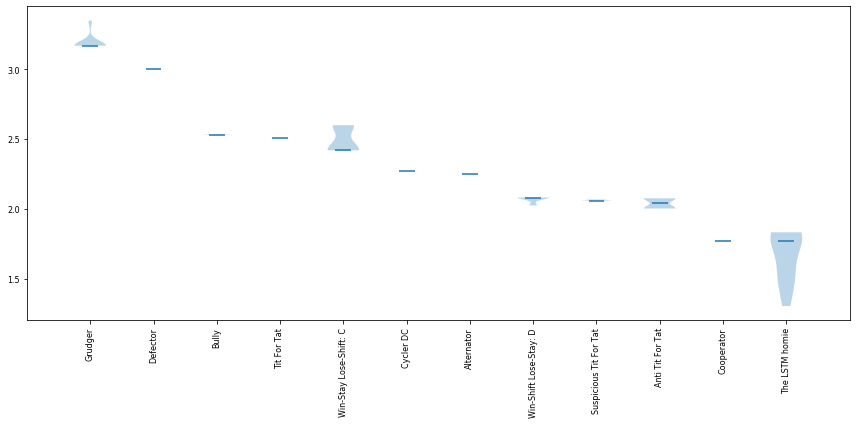

In [31]:
plot = axl.Plot(results)
p = plot.boxplot()
p.show()

**Non stochastic version**

In [25]:
player = LSTMPlayer(model, reshape_history_lstm_model, opening_probability=0)

In [26]:
strategies_tournament = [s() for s in axl.basic_strategies] + [player]

In [27]:
tournament = axl.Tournament(players=strategies_tournament, turns=205, repetitions=10)

In [28]:
results = tournament.play(progress_bar=False)

//anaconda3/envs/rnn/lib/python3.6/site-packages/dask/base.py:835: UserWarning: The get= keyword has been deprecated. Please use the scheduler= keyword instead with the name of the desired scheduler like 'threads' or 'processes'
  warnings.warn("The get= keyword has been deprecated. "


//anaconda3/envs/rnn/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


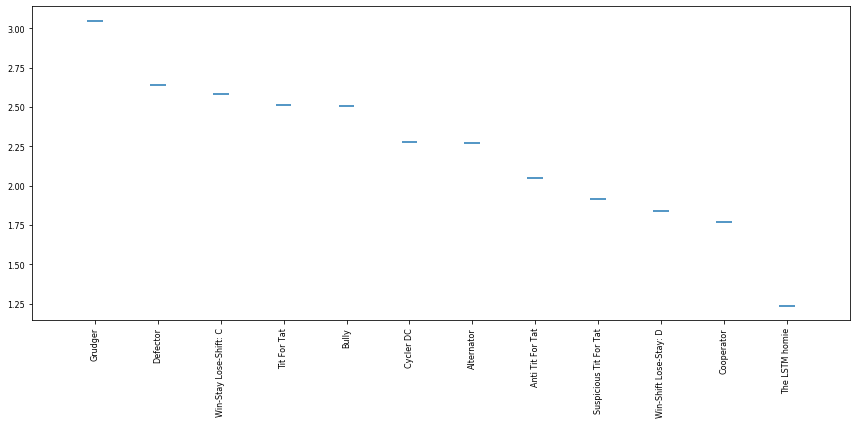

In [29]:
plot = axl.Plot(results)
p = plot.boxplot()
p.show()

In [30]:
player = LSTMPlayer(model, reshape_history_lstm_model, opening_probability=1)

In [31]:
strategies_tournament = [s() for s in axl.basic_strategies] + [player]
tournament = axl.Tournament(players=strategies_tournament, turns=205, repetitions=10)
results = tournament.play(progress_bar=False)

//anaconda3/envs/rnn/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


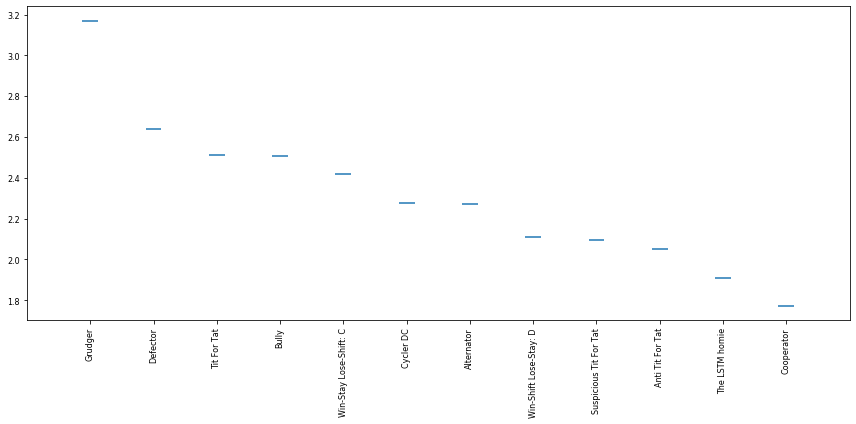

In [32]:
plot = axl.Plot(results)
p = plot.boxplot()
p.show()

**LSTM model sequence to sequence all**

In [33]:
files_location = "hawk_output/output_lstm/validation_measures_run_*.csv"
df = read_validation_dataframes(files_location)

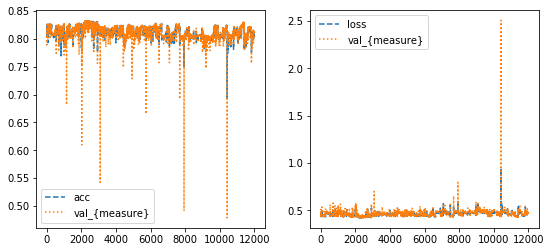

In [34]:
fig, ax = plt.subplots(ncols=2, figsize=(9, 4))

for i, measure in enumerate(['acc', 'loss']):
    ax[i].plot(df[measure], '--', label=measure);
    ax[i].plot(df[f'val_{measure}'], ':', label='val_{measure}');
    ax[i].legend();

In [35]:
model = Sequential()

model.add(
    LSTM(
        num_hidden_cells, return_sequences=True, input_shape=(None, 1)
    )
)

model.add(Dropout(rate=drop_out_rate))

model.add(Dense(1, activation="sigmoid"))

In [46]:
model.load_weights("hawk_output/output_lstm/weights-over-time.h5")

**Stochastic version**

In [53]:
player = LSTMPlayer(model, reshape_history_lstm_model)

In [54]:
strategies_tournament = [s() for s in axl.basic_strategies] + [player]
tournament = axl.Tournament(players=strategies_tournament, turns=205, repetitions=10)
results = tournament.play(progress_bar=False)

//anaconda3/envs/rnn/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


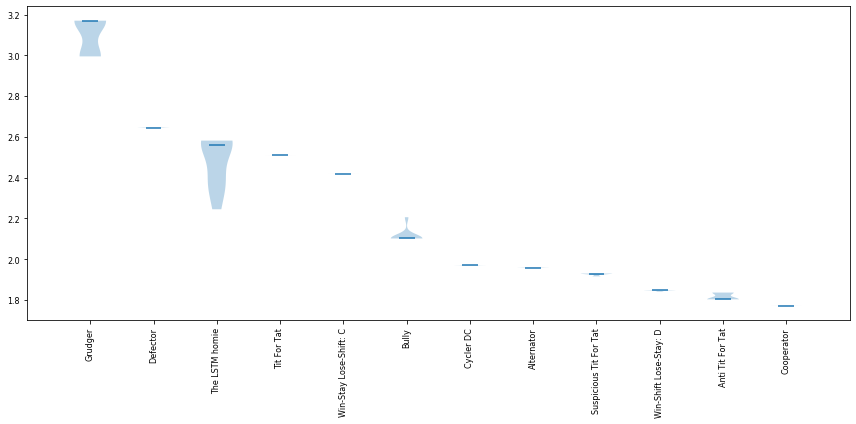

In [55]:
plot = axl.Plot(results)
p = plot.boxplot()
p.show()

**non stochastic**

In [47]:
player = LSTMPlayer(model, reshape_history_lstm_model, opening_probability=1)

In [48]:
strategies_tournament = [s() for s in axl.basic_strategies] + [player]
tournament = axl.Tournament(players=strategies_tournament, turns=205, repetitions=10)
results = tournament.play(progress_bar=False)

//anaconda3/envs/rnn/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


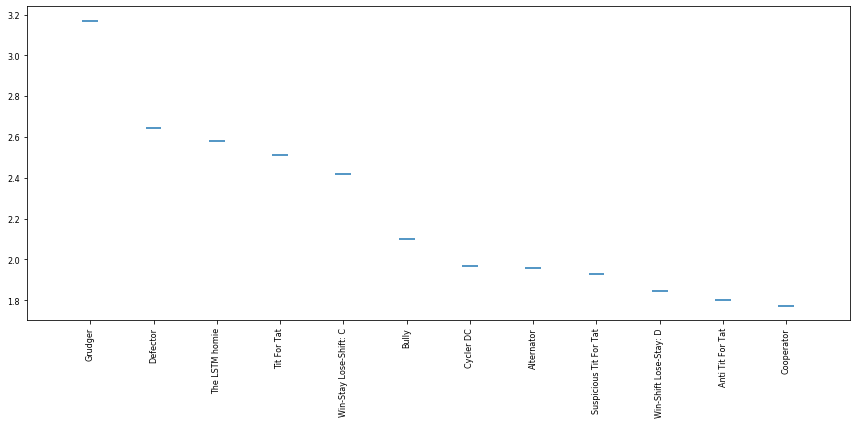

In [49]:
plot = axl.Plot(results)
p = plot.boxplot()
p.show()

In [56]:
player = LSTMPlayer(model, reshape_history_lstm_model, opening_probability=0)

In [57]:
strategies_tournament = [s() for s in axl.basic_strategies] + [player]
tournament = axl.Tournament(players=strategies_tournament, turns=205, repetitions=10)
results = tournament.play(progress_bar=False)

//anaconda3/envs/rnn/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


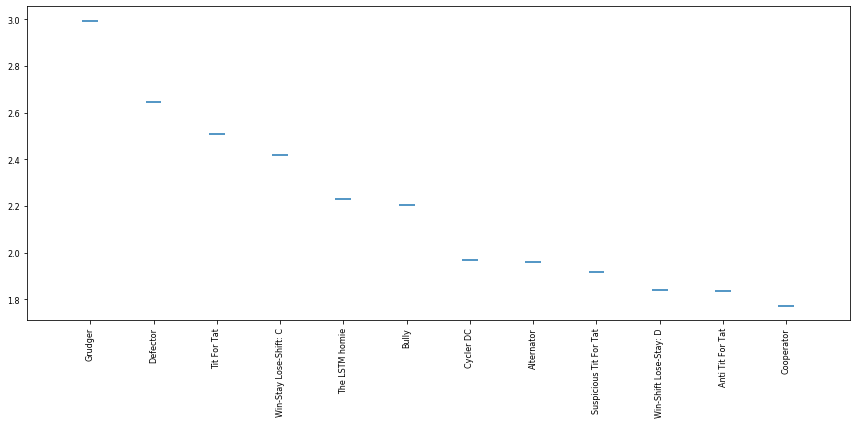

In [58]:
plot = axl.Plot(results)
p = plot.boxplot()
p.show()

**LSTM model sequence to sequence basic**

In [10]:
model = load_model('basic/output_lstm/model-over-time.h5')

In [11]:
player = LSTMPlayer(model, reshape_history_lstm_model)

In [63]:
strategies_tournament = [s() for s in axl.basic_strategies] + [player]
tournament = axl.Tournament(players=strategies_tournament, turns=205, repetitions=10)
results = tournament.play(progress_bar=False)

//anaconda3/envs/rnn/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


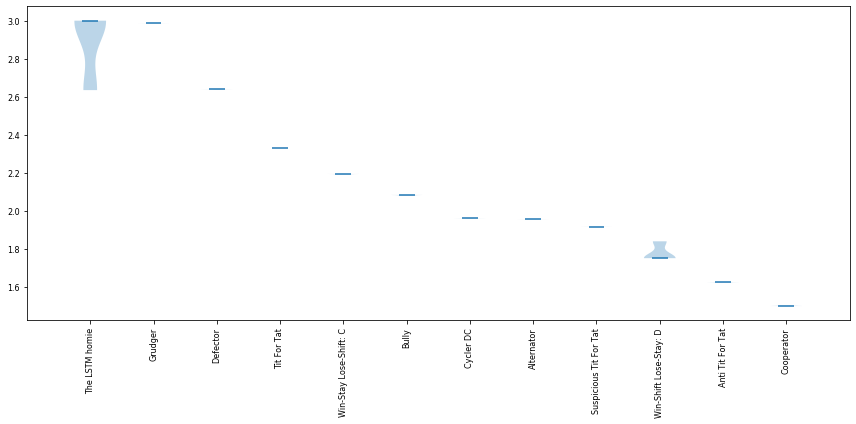

In [64]:
plot = axl.Plot(results)
p = plot.boxplot()
p.show()

**Non stochastic**

In [12]:
player = LSTMPlayer(model, reshape_history_lstm_model, opening_probability=1)

In [13]:
strategies_tournament = [s() for s in axl.basic_strategies] + [player]
tournament = axl.Tournament(players=strategies_tournament, turns=205, repetitions=10)
results = tournament.play(progress_bar=False)

//anaconda3/envs/rnn/lib/python3.6/site-packages/dask/base.py:835: UserWarning: The get= keyword has been deprecated. Please use the scheduler= keyword instead with the name of the desired scheduler like 'threads' or 'processes'
  warnings.warn("The get= keyword has been deprecated. "


//anaconda3/envs/rnn/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


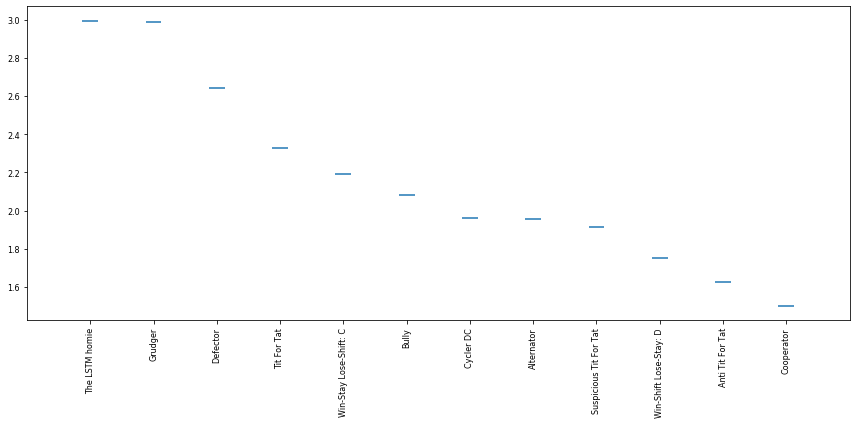

In [14]:
plot = axl.Plot(results)
p = plot.boxplot()
p.show()

In [ ]:
player = LSTMPlayer(model, reshape_history_lstm_model, opening_probability=0)

In [15]:
strategies_tournament = [s() for s in axl.basic_strategies] + [player]
tournament = axl.Tournament(players=strategies_tournament, turns=205, repetitions=10)
results = tournament.play(progress_bar=False)

//anaconda3/envs/rnn/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


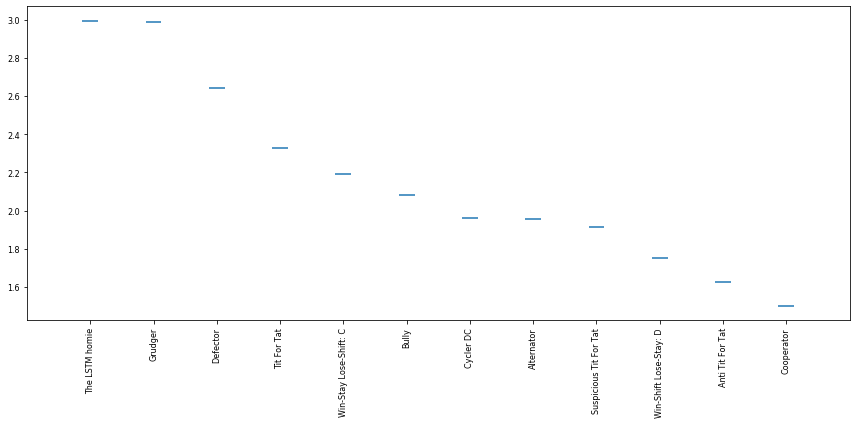

In [16]:
plot = axl.Plot(results)
p = plot.boxplot()
p.show()

In [ ]:
fingerprints on LSTM and grudger and others. 
Both types of fingerprints

Transitive against the basic, against these strategies, and Ashlocks against all these. 